<a href="https://colab.research.google.com/github/007jayesh/Credit-card-default-prediction/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

#**Importing Modules** and **loading dataset**

In [1]:
#importing the libraries
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sys 
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff 
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd "/content/drive/My Drive/Capstone Classification"

/content/drive/My Drive/Capstone Classification


In [4]:
!ls

'Credit Card Default Prediction - Capstone Project.ipynb'
'default of credit card clients excel.xls'


In [5]:
!pip install --upgrade xlrd
import pandas as pd
from pathlib import Path
source = Path.cwd() /  '/content/drive/MyDrive/Capstone Classification/default of credit card clients excel.xls'

df = pd.read_excel(source, header=1)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 3.8 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


#**Insights about data**

In [6]:
#first 10 rows
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [7]:
# Glancing through bottom 5 rows of the data
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [8]:
#Getting the shape of dataset with rows and columns
print(df.shape)

(30000, 25)


There are 30000 observations and 25 variables in the dataset

In [9]:
# Getting all the feature names
print('Features in the dataset:')
df.columns

Features in the dataset:


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [10]:
# Checking the basic structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

All the columns are of same datatype which is int64 and there is no null values <br>
Scale for PAY_0 to PAY_6 : (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

PAY_0: Repayment status in September, 2005 (scale same as above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

In our dataset, we got customer credit card transaction history for past 6 months, on basis of which we have to predict if cutomer will default or not. 

#**Data Treatment (Cleaning and Preprocessing)**

##Missing Values

In [11]:
import missingno as msno

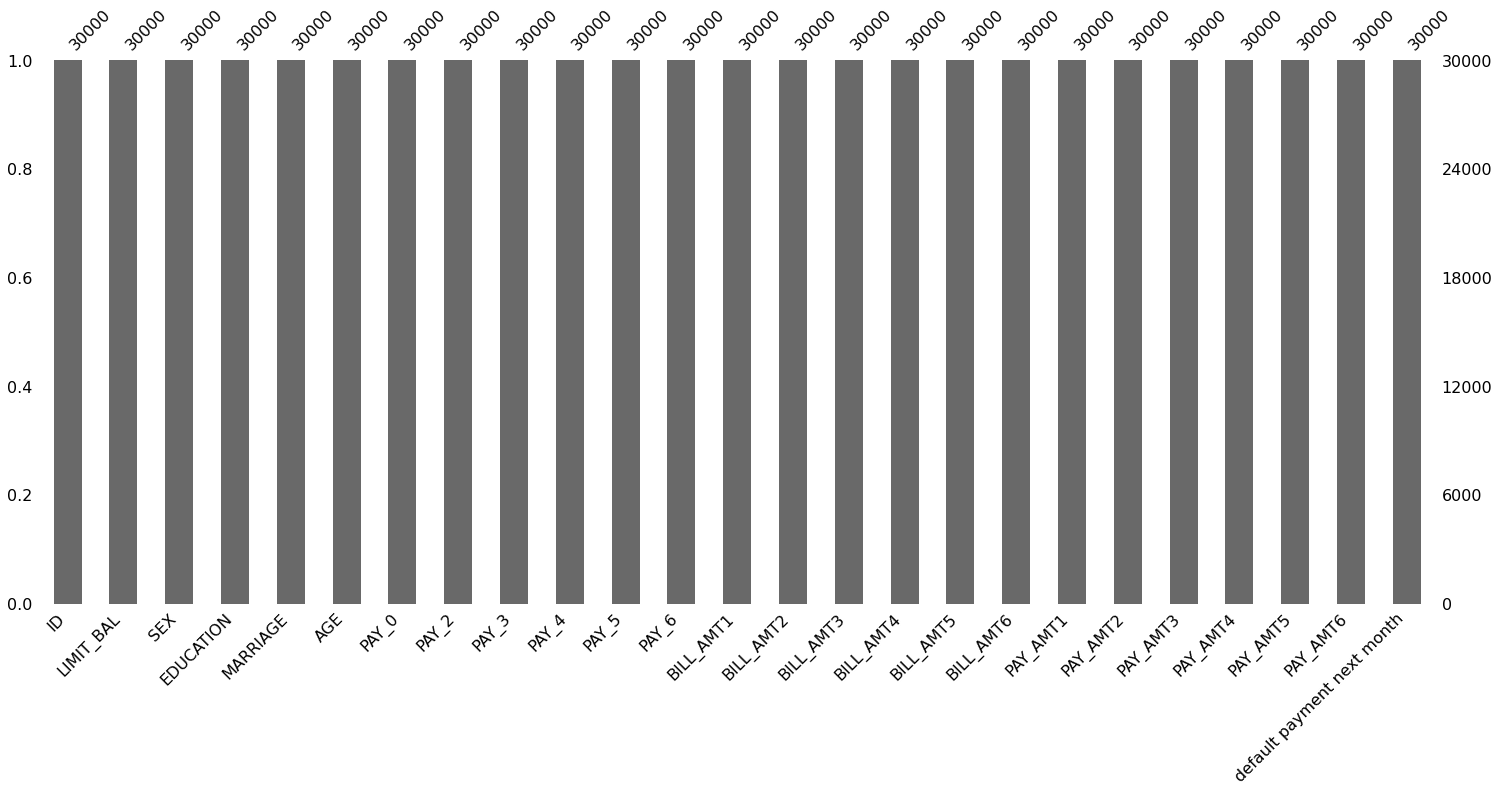

In [12]:
msno.bar(df)

As we can see from above plot, luckily we don't haave any missing values in the dataset.

In [13]:
# Checking null values
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

We don't have any missing values in our dataset

##Duplicate Values

In [14]:
# Checking the duplicate values
duplicate_value = df.duplicated().sum()
#value = len(cred_dfred_df.duplicated()]) #storing the total duplicated values in the dataset in a variable
print('Total duplicated values in the dataset are:', duplicate_value)

Total duplicated values in the dataset are: 0


##Structure formatting

In [15]:
#Changing variables names to more meaningful names
df.rename(columns={'LIMIT_BAL': 'credit_limit',
                   'SEX': 'gender',
                   'EDUCATION' : 'education',
                   'MARRIAGE' : 'marital_status',
                   'AGE' : 'age',
                   'PAY_0': 'payment_status_sept',
                   'PAY_2': 'payment_status_aug',
                   'PAY_3': 'payment_status_jul',
                   'PAY_4': 'payment_status_jun',
                   'PAY_5': 'payment_status_may',
                   'PAY_6': 'payment_status_apr',
                   'BILL_AMT1': 'bill_sept',
                   'BILL_AMT2': 'bill_aug',
                   'BILL_AMT3': 'bill_jul',
                   'BILL_AMT4': 'bill_jun',
                   'BILL_AMT5': 'bill_may',
                   'BILL_AMT6': 'bill_apr',
                   'PAY_AMT1': 'payment_amount_sept',
                   'PAY_AMT2': 'payment_amount_aug',
                   'PAY_AMT3': 'payment_amount_jul',
                   'PAY_AMT4': 'payment_amount_jun',
                   'PAY_AMT5': 'payment_amount_may',
                   'PAY_AMT6': 'payment_amount_apr',
                   'dpnm' : 'default_payment',
                   'default payment next month':'IsDefaulter'}, inplace=True)

In [16]:
#converting the categorical features into object datatype
df[['gender','education','marital_status','payment_status_sept','payment_status_aug','payment_status_jul',
    'payment_status_jun','payment_status_may','payment_status_apr']] =df[['gender','education','marital_status','payment_status_sept','payment_status_aug','payment_status_jul',
    'payment_status_jun','payment_status_may','payment_status_apr']].apply(lambda x: x.astype('object'))

df.info() #checking whether the datatype has updated

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   30000 non-null  int64 
 1   credit_limit         30000 non-null  int64 
 2   gender               30000 non-null  object
 3   education            30000 non-null  object
 4   marital_status       30000 non-null  object
 5   age                  30000 non-null  int64 
 6   payment_status_sept  30000 non-null  object
 7   payment_status_aug   30000 non-null  object
 8   payment_status_jul   30000 non-null  object
 9   payment_status_jun   30000 non-null  object
 10  payment_status_may   30000 non-null  object
 11  payment_status_apr   30000 non-null  object
 12  bill_sept            30000 non-null  int64 
 13  bill_aug             30000 non-null  int64 
 14  bill_jul             30000 non-null  int64 
 15  bill_jun             30000 non-null  int64 
 16  bill

In [17]:
#Setting Id column as index
df.set_index('ID', inplace = True)
df

,credit_limit,gender,education,marital_status,age,payment_status_sept,payment_status_aug,payment_status_jul,payment_status_jun,payment_status_may,...,bill_jun,bill_may,bill_apr,payment_amount_sept,payment_amount_aug,payment_amount_jul,payment_amount_jun,payment_amount_may,payment_amount_apr,IsDefaulter
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


#**Handling Outliers**

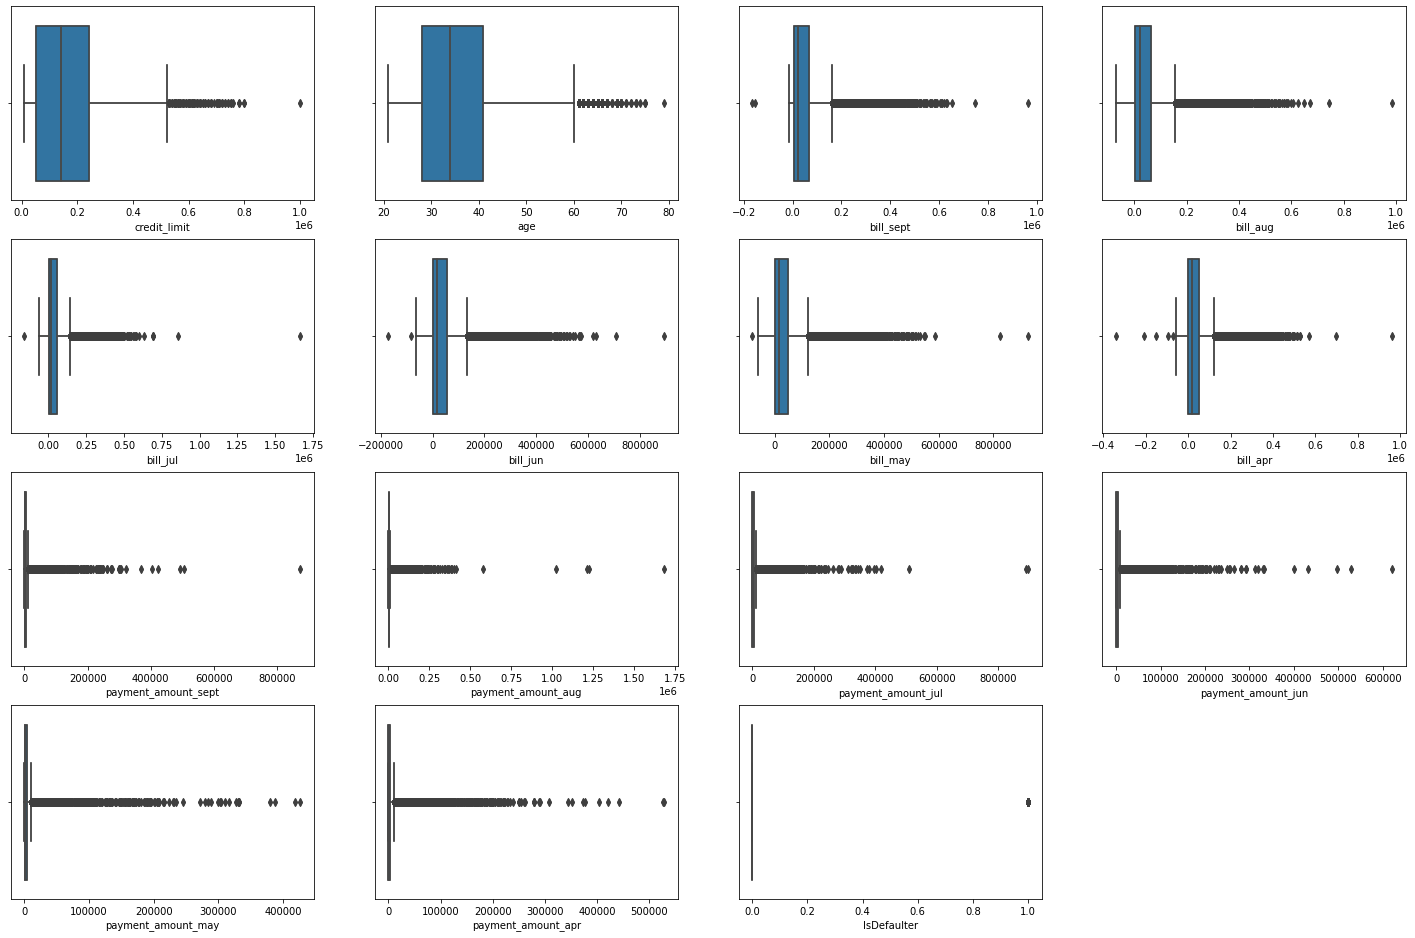

In [18]:
#plotting boxplots plot for all numerical features
feat_num = df.select_dtypes(include =['int64', 'float64'])

plt.figure(figsize=(25,25))
n=1

for column in feat_num:
  plt.subplot(6,4,n)
  n = n+1
  sns.boxplot(df[column], color ='skyblue' )
  sns.boxplot(df[column])

There are many methods to remove the outliers that helps in to normalise our data such as IQR,Z=score, percentile method etc. Lets try using the most effective method which is IQR

For credit_limit Upper limit is 525000.0, and lower limit is -45000.0
For age Upper limit is 60.5, and lower limit is 21.5
For bill_sept Upper limit is 162389.375, and lower limit is -28207.375
For bill_aug Upper limit is 155538.5, and lower limit is -27526.0
For bill_jul Upper limit is 146412.5, and lower limit is -26083.0
For bill_jun Upper limit is 132774.875, and lower limit is -23762.875
For bill_may Upper limit is 122831.75, and lower limit is -22450.75
For bill_apr Upper limit is 121111.625, and lower limit is -22715.125
For payment_amount_sept Upper limit is 11015.0, and lower limit is -1003.0
For payment_amount_aug Upper limit is 11250.5, and lower limit is -1250.5
For payment_amount_jul Upper limit is 10677.5, and lower limit is -1667.5
For payment_amount_jun Upper limit is 9589.125, and lower limit is -1562.625
For payment_amount_may Upper limit is 9700.0, and lower limit is -1637.0
For payment_amount_apr Upper limit is 9823.375, and lower limit is -1823.375
For IsDefaulter 

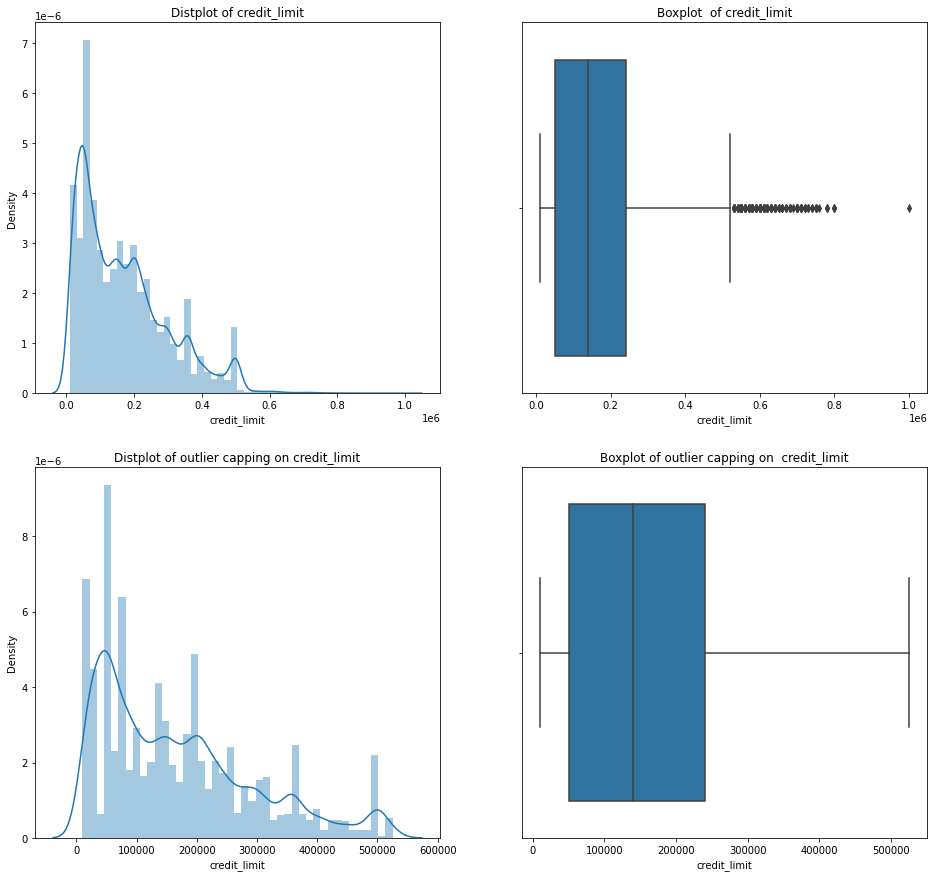

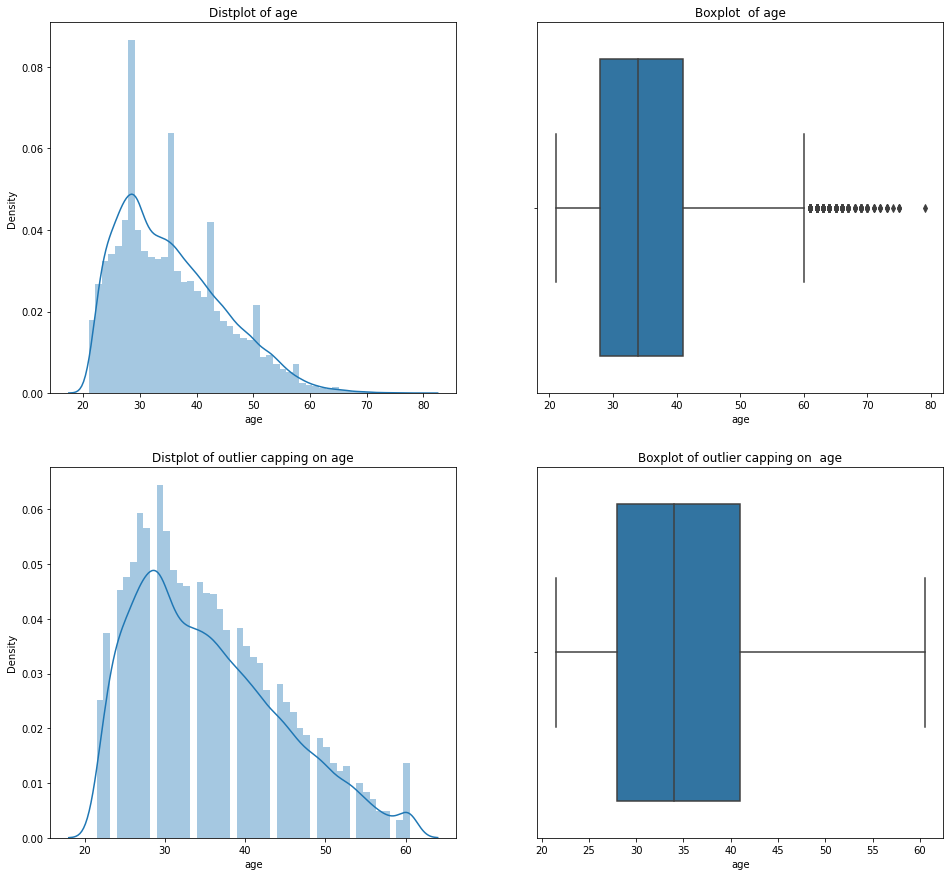

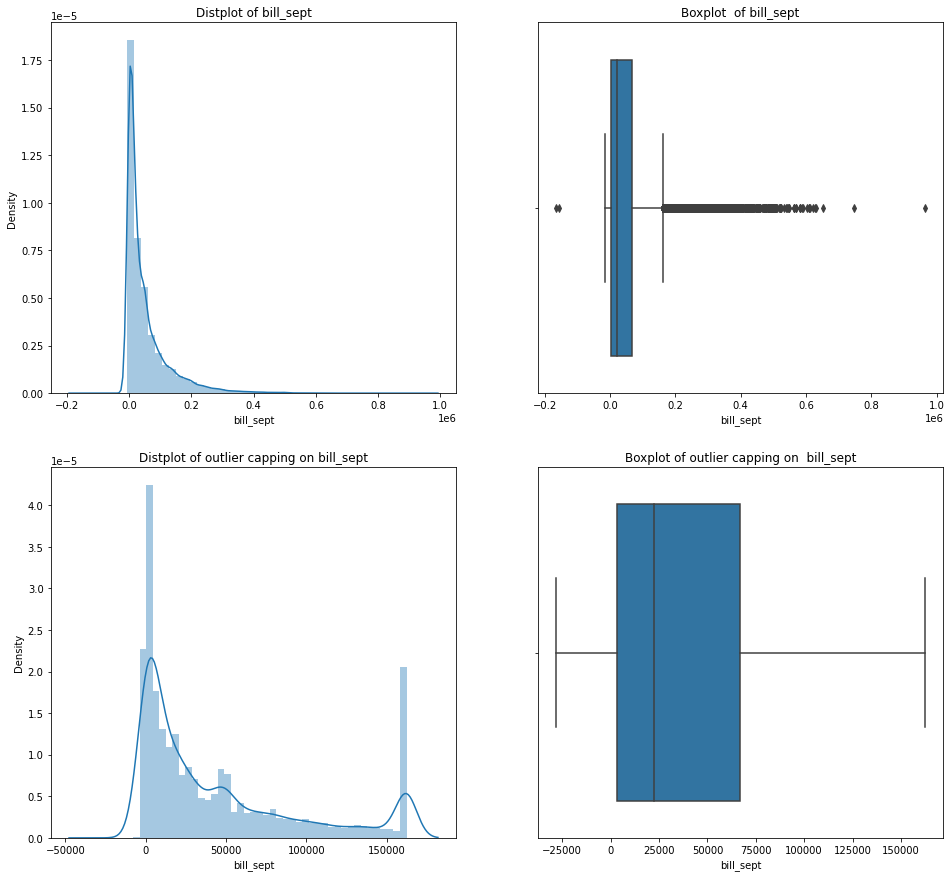

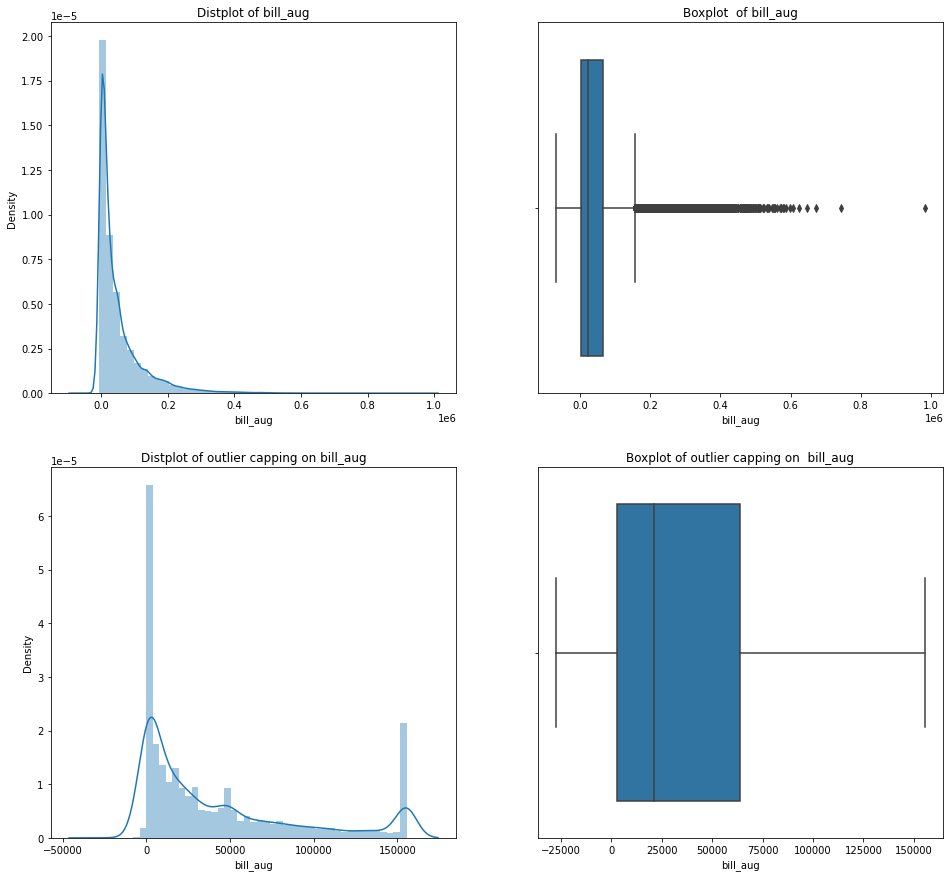

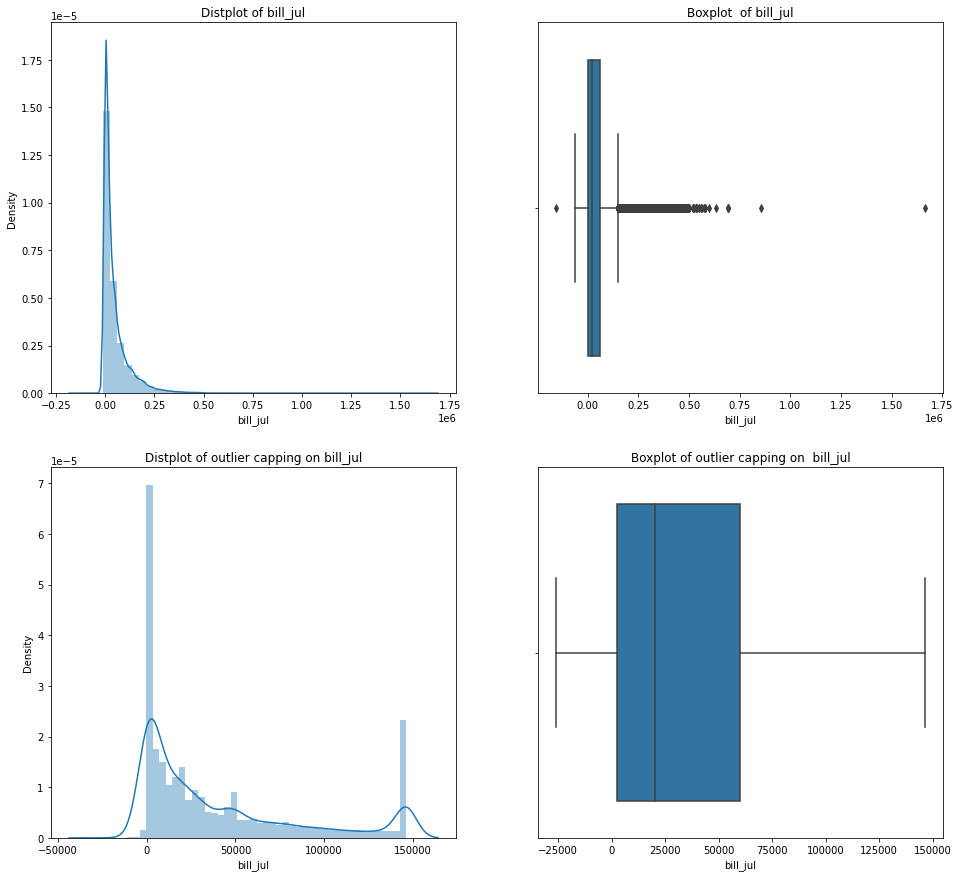

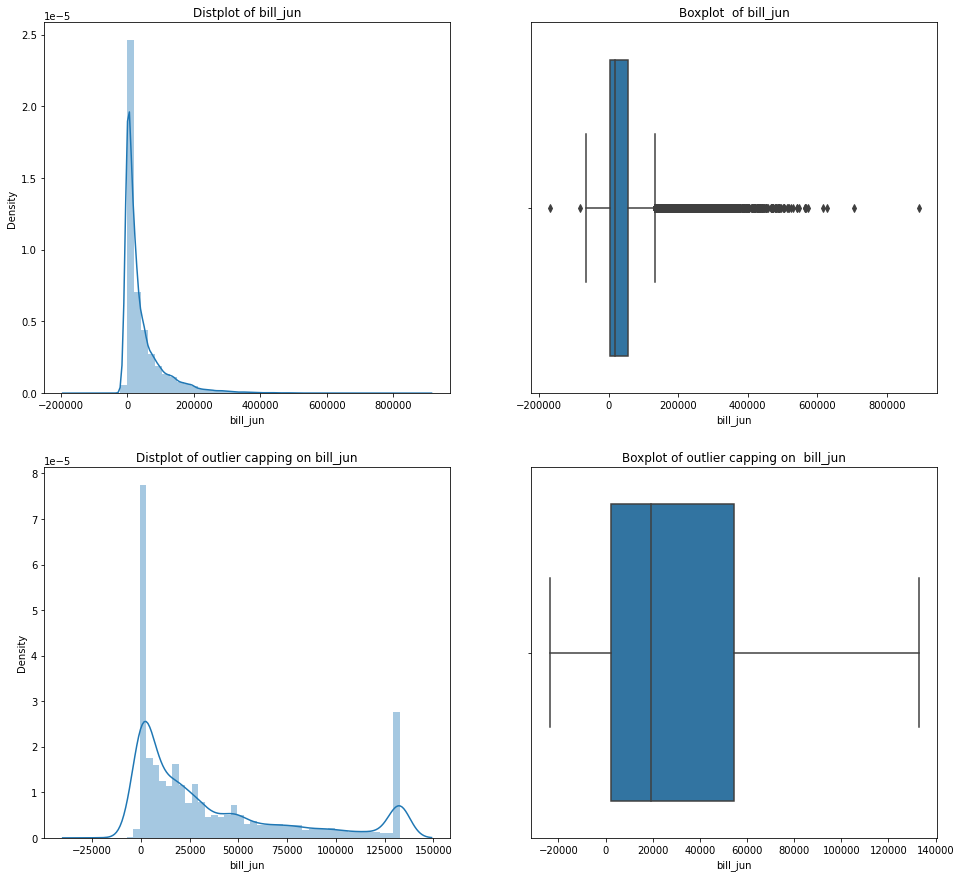

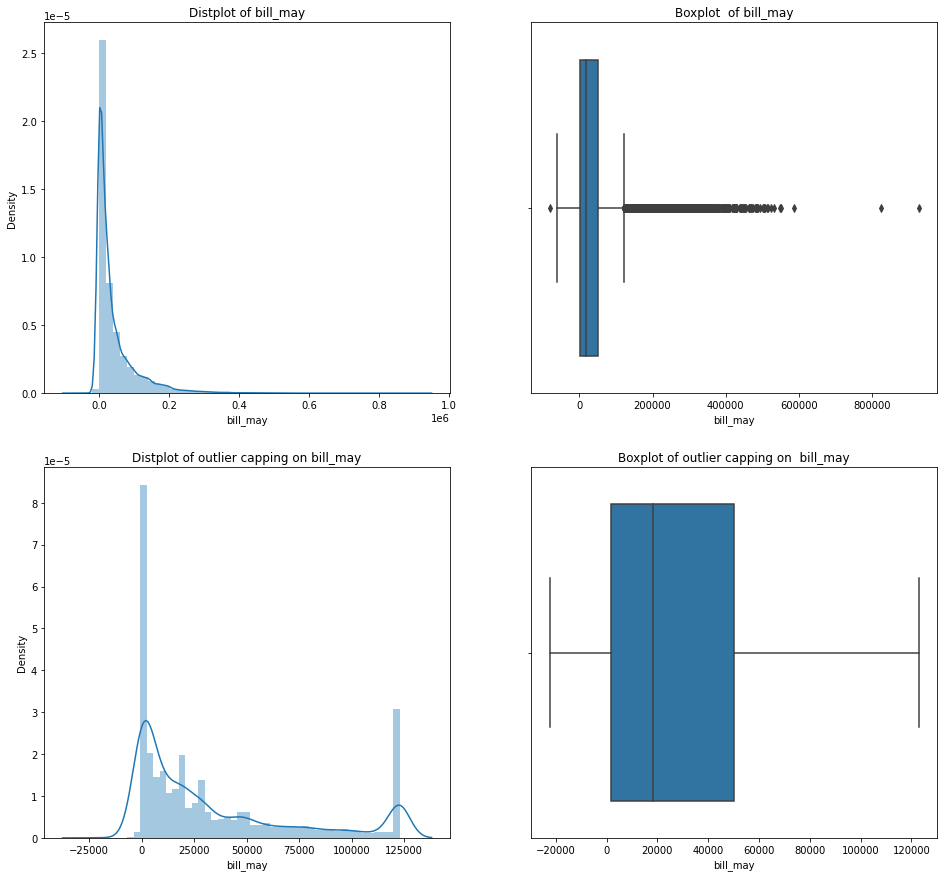

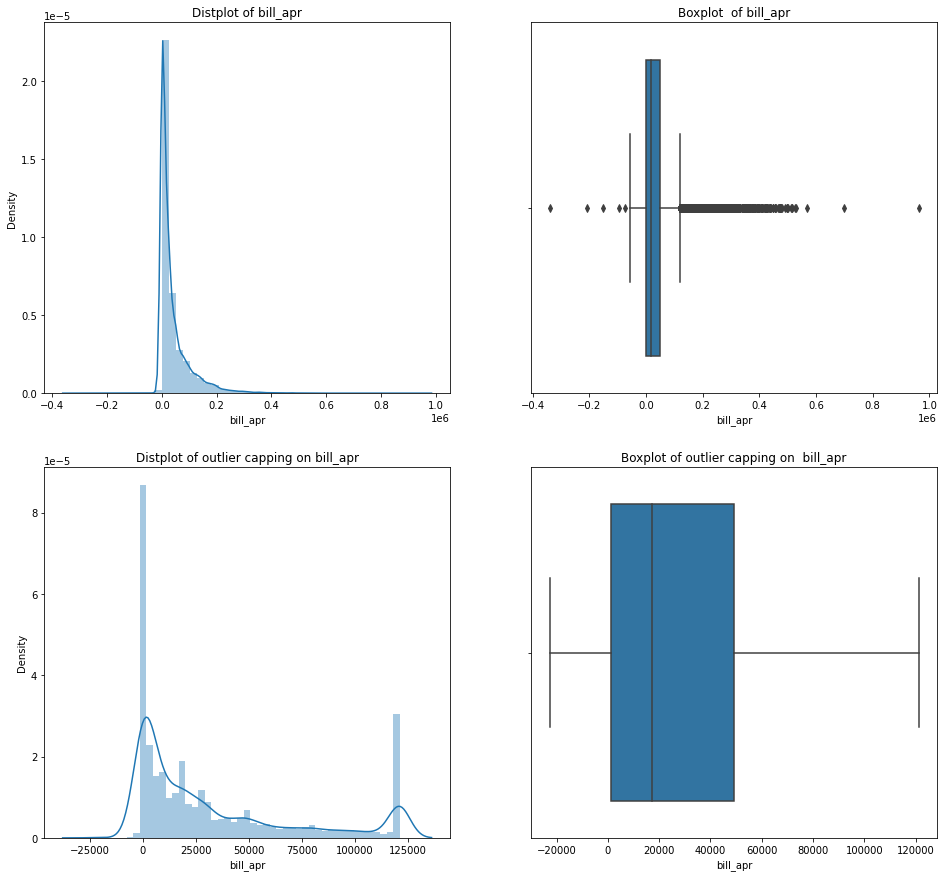

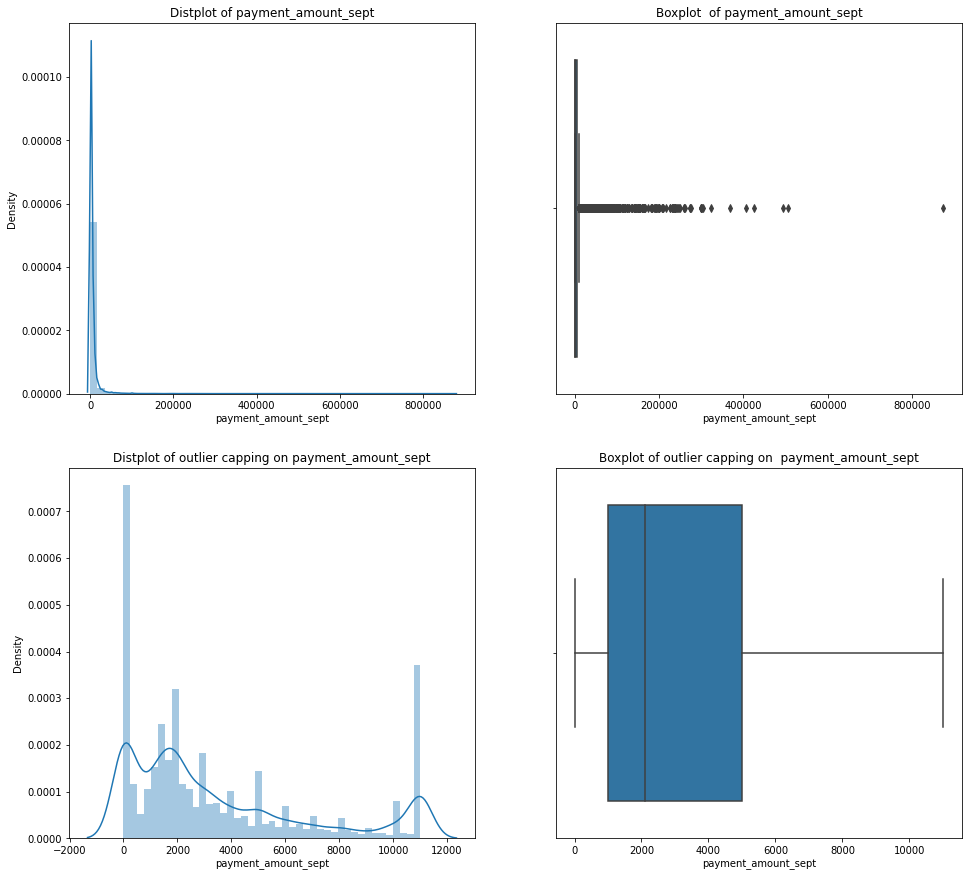

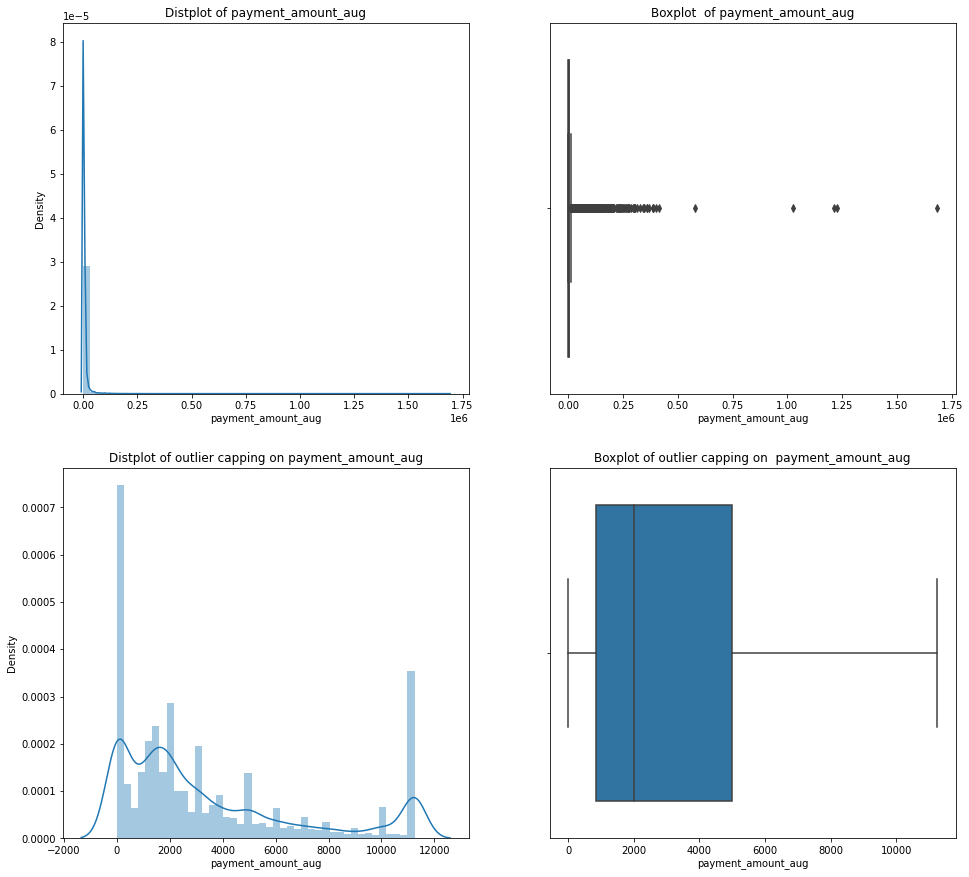

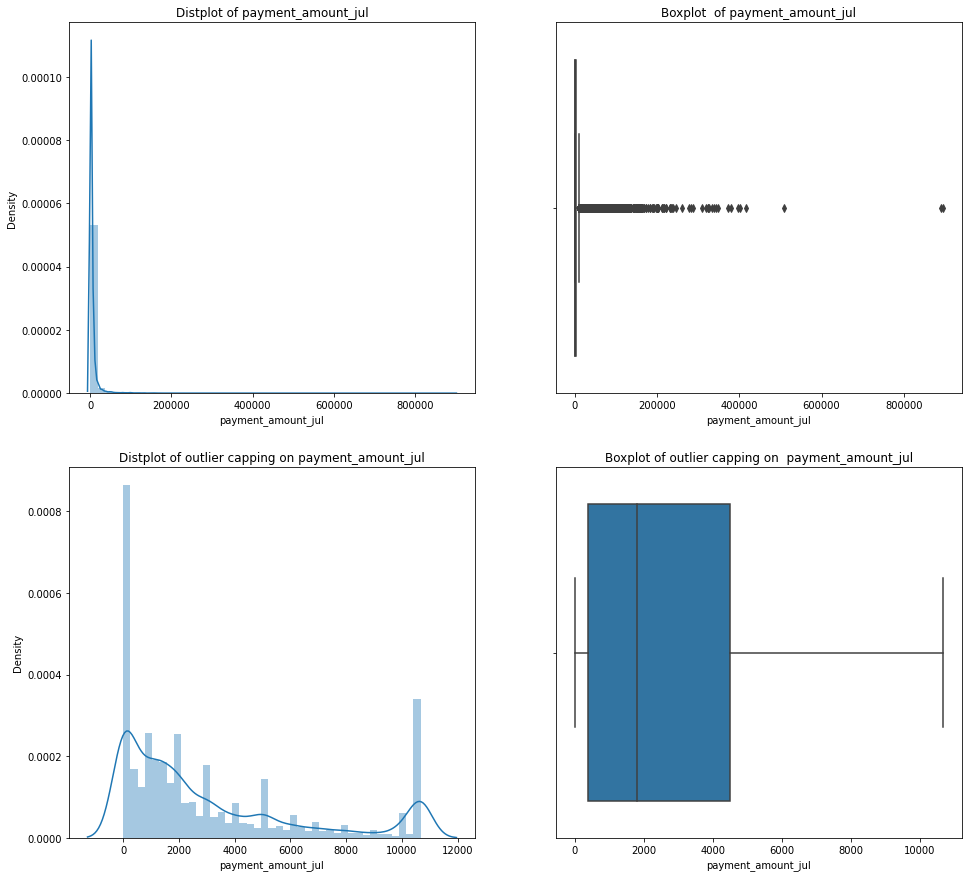

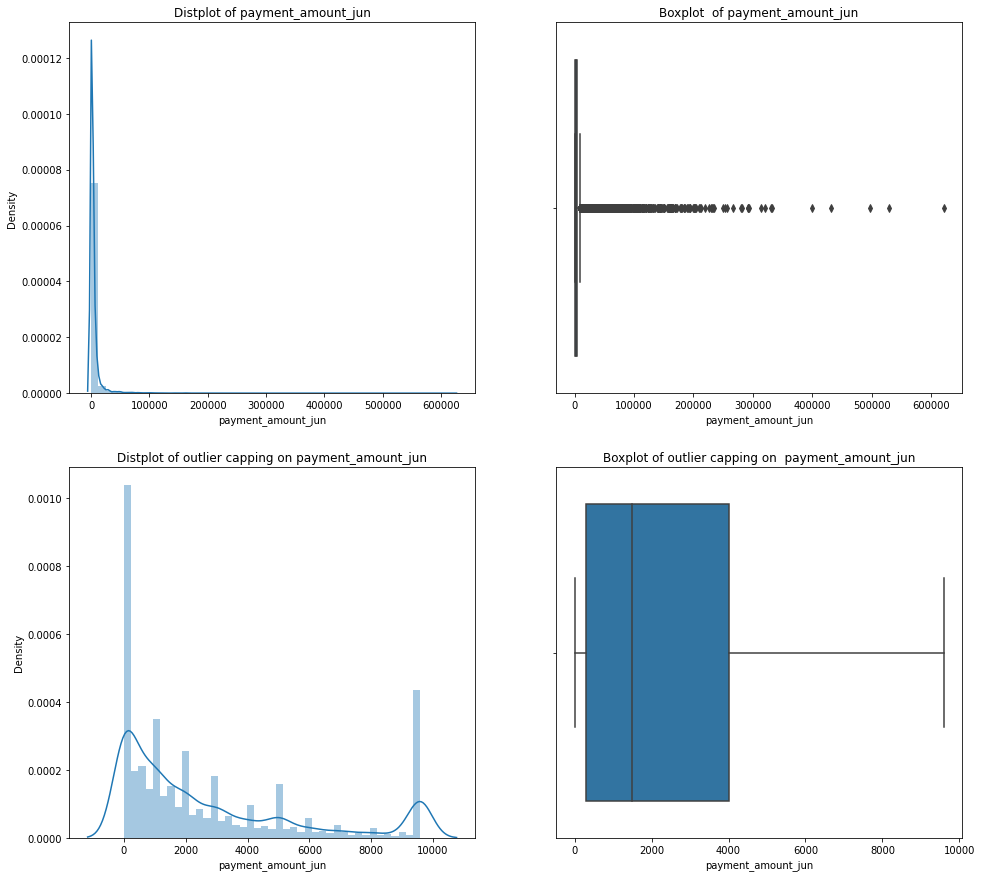

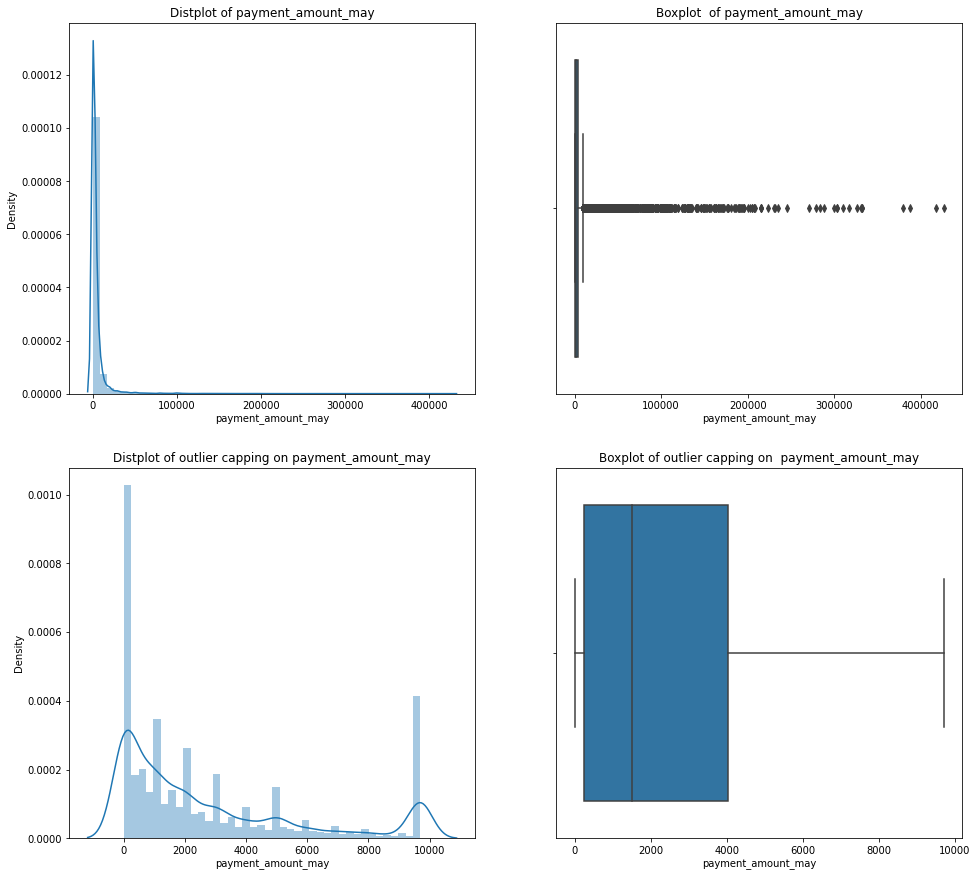

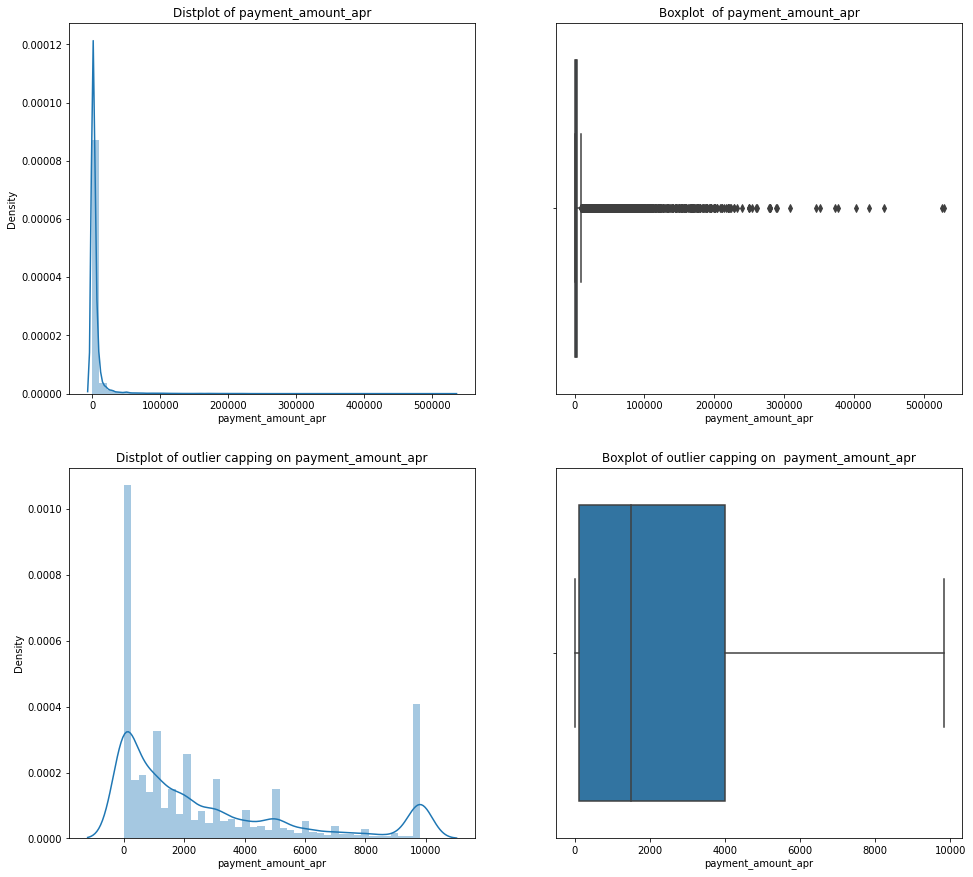

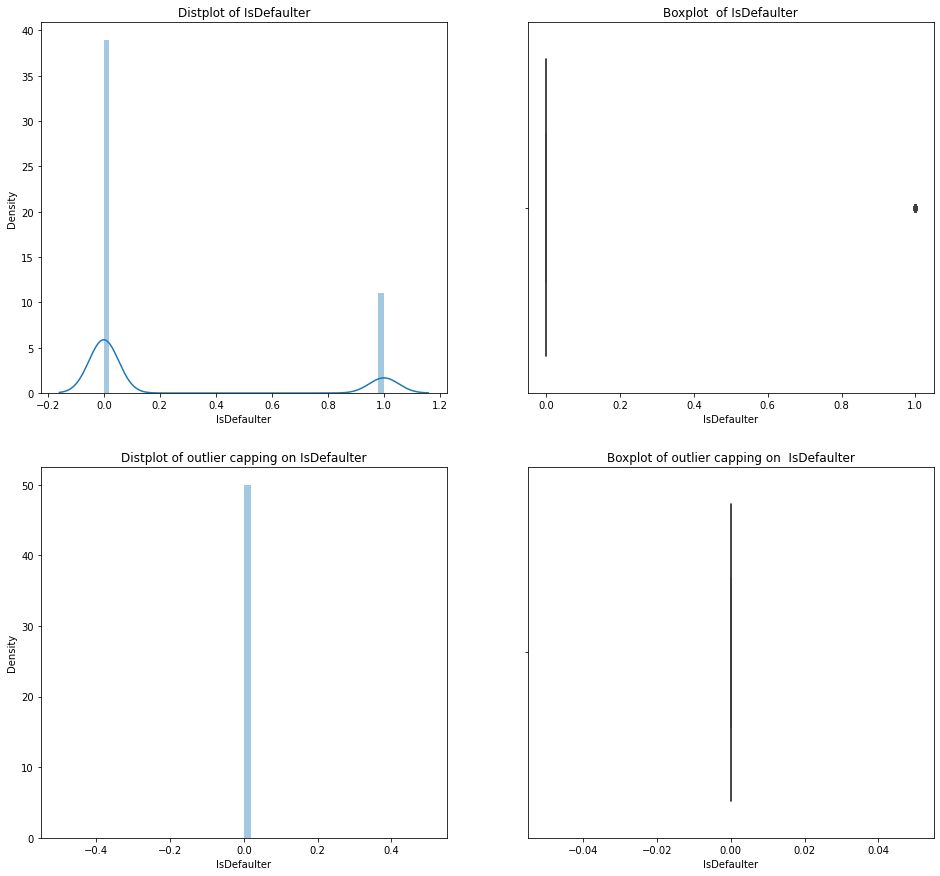

In [19]:
#creating a for loop to iterate over  and capp all the outliers on entire numerical features
for i in feat_num:
  p25 = feat_num[i].quantile(0.25) #creating a variabel for 25th percentile
  p75 = feat_num[i].quantile(0.75) #creating a variabel for 75th percentile
  iqr = p75-p25 #calculating the  interquartile range
  upper_limit = p75 + 1.5 * iqr # caculating the upper bound limit, above which the data will be considered outlier
  lower_limit = p75 - 1.5 * iqr # # caculating the lower bound limit, below  which the data will be considered outlier

  print(f'For {i} Upper limit is {upper_limit}, and lower limit is {lower_limit}') # printing the upper and lower limit of each feature

  feat_num[df[i] > upper_limit] #to check the outlier record
  feat_num[df[i] < lower_limit] #to check the outlier record
  new_df_cap = feat_num.copy() #definig new dataframe to store the oulier capped dataset
  new_df_cap[i] = np.where(new_df_cap[i] > upper_limit, upper_limit, 
    np.where(new_df_cap[i] < lower_limit, lower_limit,new_df_cap[i])) # replacing the outliers with the  specifed limits

#ploting a figure to compare the difference in distribution of data
  plt.figure(figsize = (16,15)) 
  plt.subplot(2,2,1)
  sns.distplot(df[i])
  plt.title(f'Distplot of {i}')
  plt.subplot(2,2,2)
  sns.boxplot(df[i])
  plt.title(f'Boxplot  of {i}')
  plt.subplot(2,2,3)
  sns.distplot(new_df_cap[i])
  plt.title(f'Distplot of outlier capping on {i}')
  plt.subplot(2,2,4)
  sns.boxplot(new_df_cap[i])
  plt.title(f'Boxplot of outlier capping on  {i}')

#**Exploratory Data Analysis**

##**Analysis of dependent Variable:**

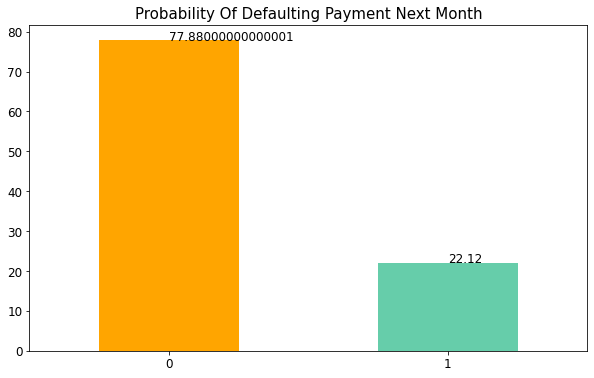

In [20]:
#plotting the count plot to vizualize the data distribution 
def_cnt = (df.IsDefaulter.value_counts(normalize=True)*100) #calculating percetnage of the datapoints. Normalize is used to divide the total into each of the category presernt in the dataset
def_cnt.plot.bar(figsize=(10,6), color = ['orange','mediumaquamarine']) #plotting a bar plot
plt.xticks(fontsize=12, rotation=0) #adjusting size and adding x ticks, rotation =0 means the x labels will be same
plt.yticks(fontsize=12)
plt.title("Probability Of Defaulting Payment Next Month", fontsize=15) # title of plot
for x,y in zip([0,1],def_cnt): # to annotate the values on top of the bars
    plt.text(x,y,y,fontsize=12)
plt.show()

**About 22% people are expected to default next month and 77.8% are not expected to default**

In [21]:
df['IsDefaulter'].value_counts()

0    23364
1     6636
Name: IsDefaulter, dtype: int64

**Observations** <br>
**0 - Not Default** <br>
**1 - Default** <br>
**There is a huge difference between both classes so we have to do SMOTE for class balancing**

##**Independent Variable** <br>






####**Gender**
1 - Male, 2 - Female

In [22]:
# Change gender code to 'F' and 'M' and use category as datatype to get better readability

df["gender"]=df["gender"].map({1:'M',2:'F'}).astype('category')
df["gender"].dtypes

CategoricalDtype(categories=['F', 'M'], ordered=False)

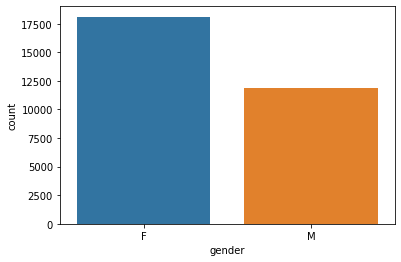

In [23]:
# understanding the distribution of male and female in the dataset
df['gender'].value_counts(normalize = True)
sns.countplot(x = 'gender', data = df)

Most of the credit card users are female which counts to 60% of total data.





####**Education**
1 = graduate school; 2 = university; 3 = high school; 4 = others

In [24]:
#counting the fraction of educational diversity
df['education'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: education, dtype: int64

In [25]:
combine_df = (df['education'] == 5) | (df['education'] == 6) | (df['education'] == 0)
df.loc[combine_df, 'education'] = 4
df['education'].value_counts(normalize = True)

2    0.467667
1    0.352833
3    0.163900
4    0.015600
Name: education, dtype: float64

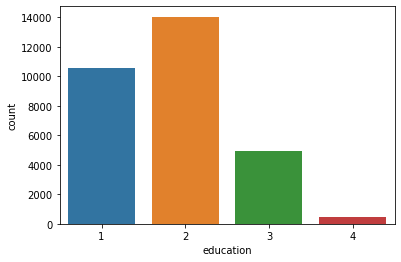

In [26]:
sns.countplot(x = 'education', data = df)

Majority of the users are university students counting to around 47% of total counts.

####**Marriage**
1 = married; 2 = single; 3 = others

In [27]:
#checking marital status 
df['marital_status'].value_counts()

2    15964
1    13659
3      323
0       54
Name: marital_status, dtype: int64

0th class have very low ratio compared to other classes so we can add this to **other** class

In [28]:
m_comb = df['marital_status'] == 0
df.loc[m_comb, 'marital_status'] = 3
df['marital_status'].value_counts(normalize = True)

2    0.532133
1    0.455300
3    0.012567
Name: marital_status, dtype: float64

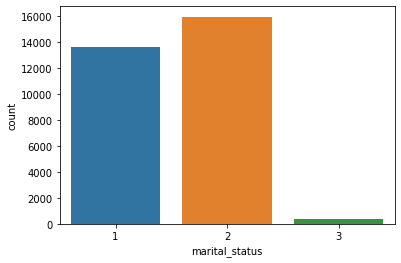

In [29]:
sns.countplot(x = 'marital_status', data = df)

Majority(53%) credit cards are owned by single people

####**Plotting payment status for different months**
-1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above

In [30]:
df['payment_status_sept'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: payment_status_sept, dtype: int64

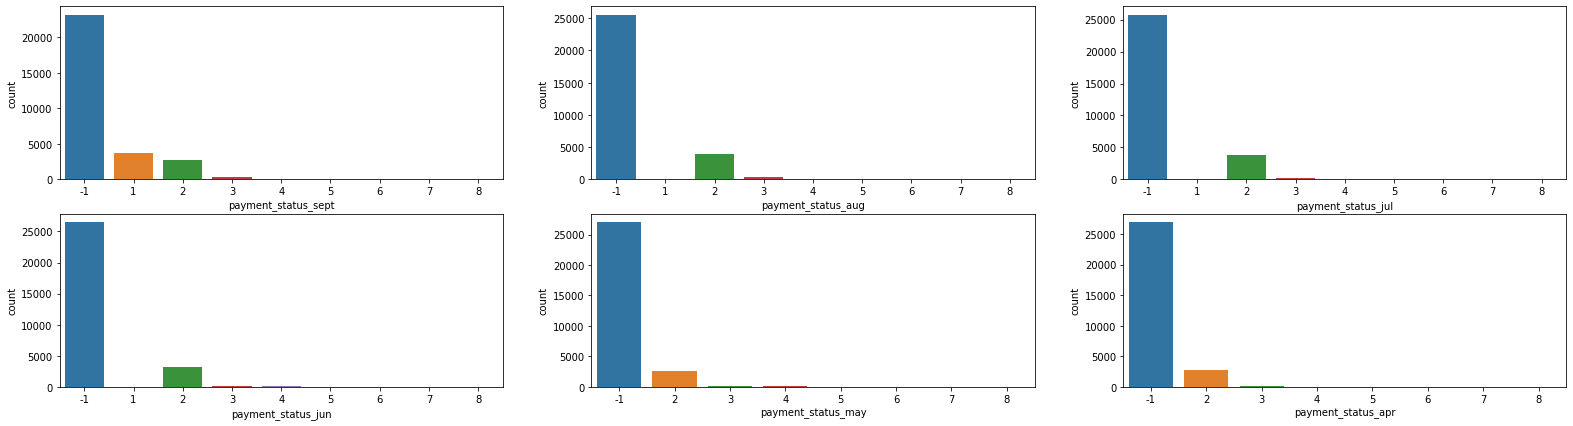

In [31]:
#Merging -2 and 0 to -1 because it all belongs to bill paid on time and plotting countplots for different months
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(27, 7))
ax = axes.flatten()

pay_comb  = (df['payment_status_sept'] == 0) | (df['payment_status_sept'] == -2) 
df.loc[pay_comb, 'payment_status_sept'] = -1 
sns.countplot(x = 'payment_status_sept', data = df, ax=ax[0])

pay_comb_aug  = (df['payment_status_aug'] == 0) | (df['payment_status_aug'] == -2) 
df.loc[pay_comb_aug, 'payment_status_aug'] = -1 
sns.countplot(x = 'payment_status_aug', data = df, ax=ax[1])

pay_comb_july  = (df['payment_status_jul'] == 0) | (df['payment_status_jul'] == -2) 
df.loc[pay_comb_july, 'payment_status_jul'] = -1 
sns.countplot(x = 'payment_status_jul', data = df,ax=ax[2])

pay_comb_june  = (df['payment_status_jun'] == 0) | (df['payment_status_jun'] == -2) 
df.loc[pay_comb_june, 'payment_status_jun'] = -1 
sns.countplot(x = 'payment_status_jun', data = df,ax=ax[3])

pay_comb_may  = (df['payment_status_may'] == 0) | (df['payment_status_may'] == -2) 
df.loc[pay_comb_may, 'payment_status_may'] = -1 
sns.countplot(x = 'payment_status_may', data = df,ax=ax[4])
              
pay_comb_apr  = (df['payment_status_apr'] == 0) | (df['payment_status_apr'] == -2) 
df.loc[pay_comb_apr, 'payment_status_apr'] = -1 
sns.countplot(x = 'payment_status_apr', data = df,ax=ax[5])

###**Observations**
* More than 20000 customers paid the september bill on time.
* Around 25000 customers paid the august bill on time and only 2nd and 3rd month has some delayed payments and similar for other months
* **Overall, around 80% of the customers had paid the previous month bill on time. The defaulter rate was very very less.**





##**Categorical features**

In [32]:
#creating a dataframe to store the categorical features
categorical_features = ['gender', 'education', 'marital_status','payment_status_sept','payment_status_aug','payment_status_jul',
    'payment_status_jun','payment_status_may','payment_status_apr','age']

In [33]:
#saving required feature in a new dataframe to ease the analysis
cat_df = df[categorical_features]
cat_df['Defaulter'] = df['IsDefaulter']

In [34]:
#since, the values were label encoded. We are decoding the labels for clearer visualization
cat_df.replace({'gender': {1 : 'MALE', 2 : 'FEMALE'},
                'education' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'},
                'marital_status' :  {1 : 'Married', 2 : 'Single', 3 : 'Others'}},inplace=True)

<Figure size 720x360 with 0 Axes>

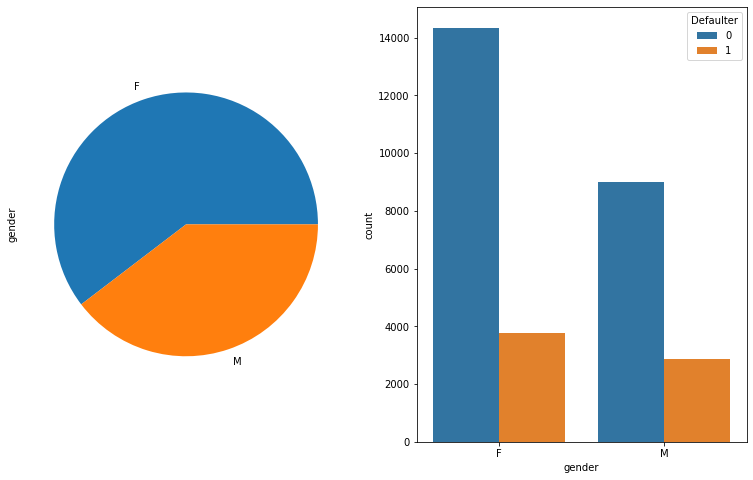

<Figure size 720x360 with 0 Axes>

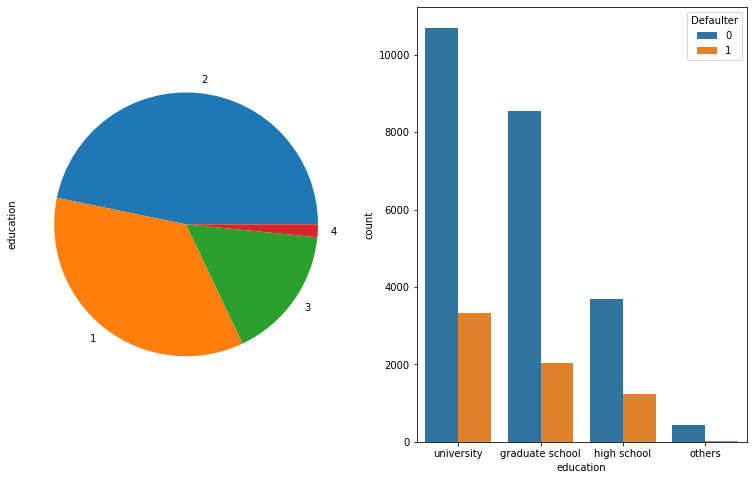

<Figure size 720x360 with 0 Axes>

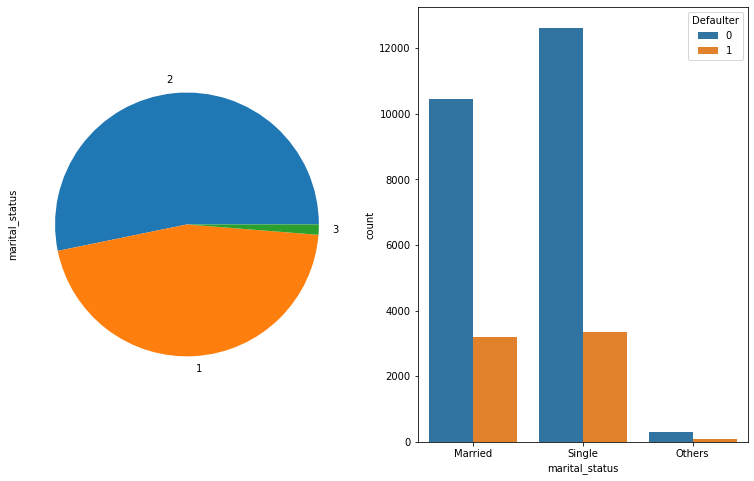

<Figure size 720x360 with 0 Axes>

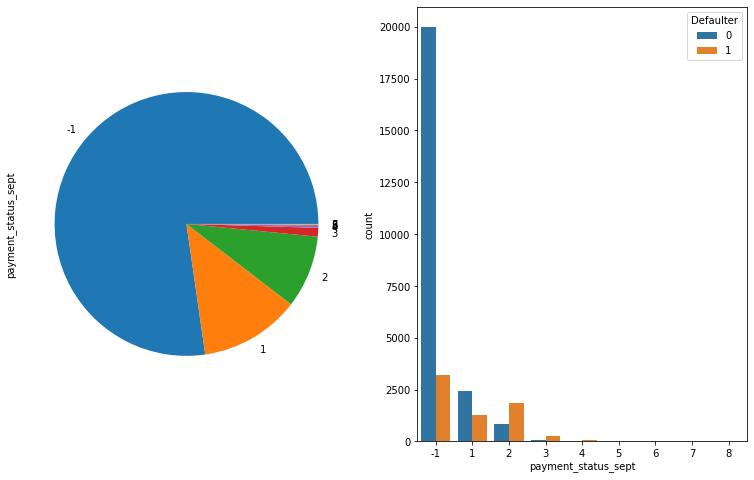

<Figure size 720x360 with 0 Axes>

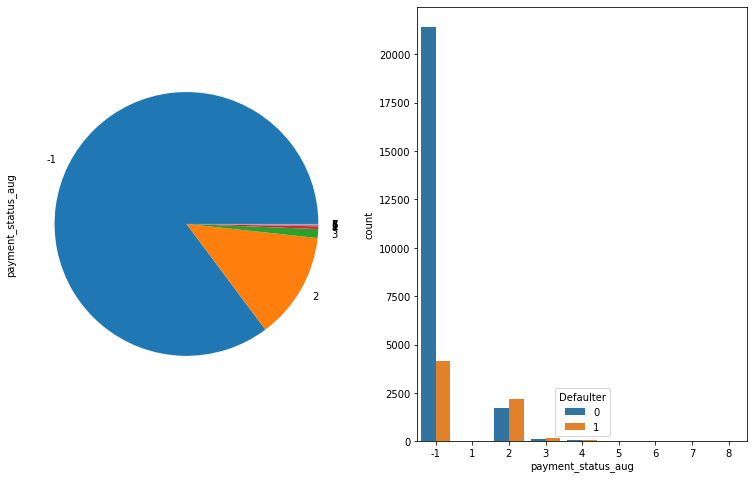

<Figure size 720x360 with 0 Axes>

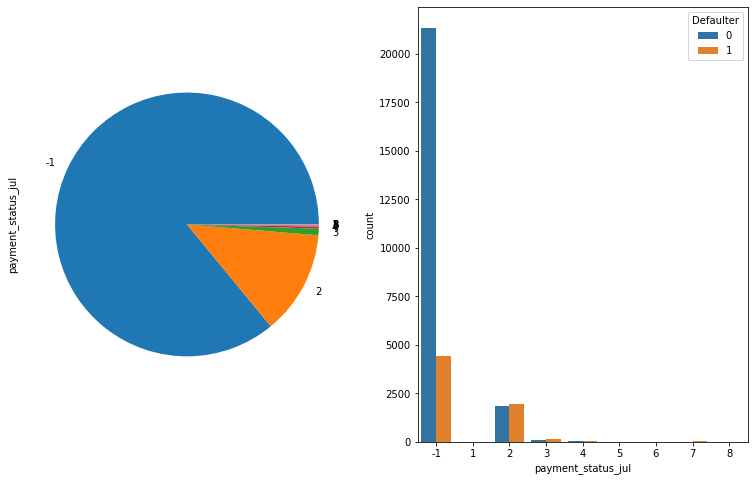

<Figure size 720x360 with 0 Axes>

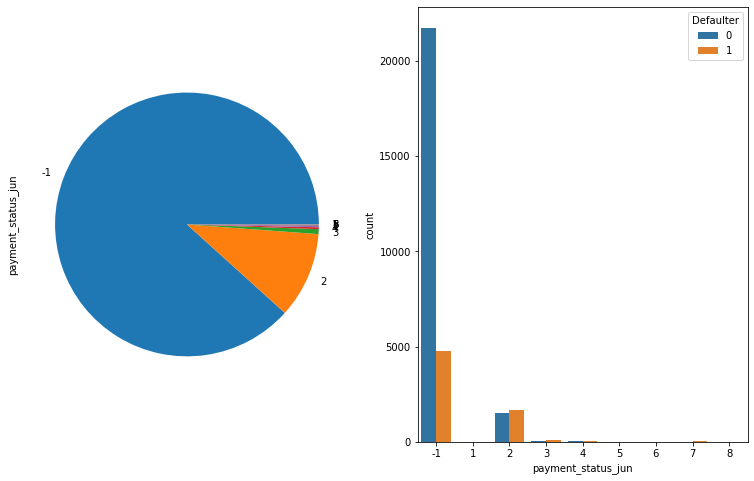

<Figure size 720x360 with 0 Axes>

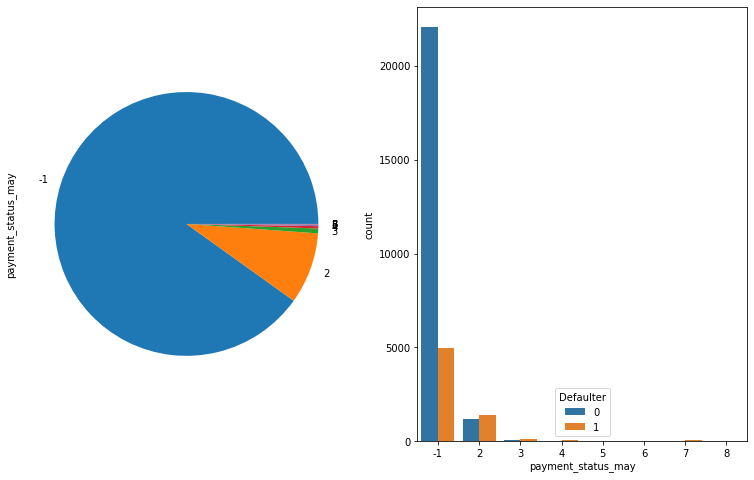

<Figure size 720x360 with 0 Axes>

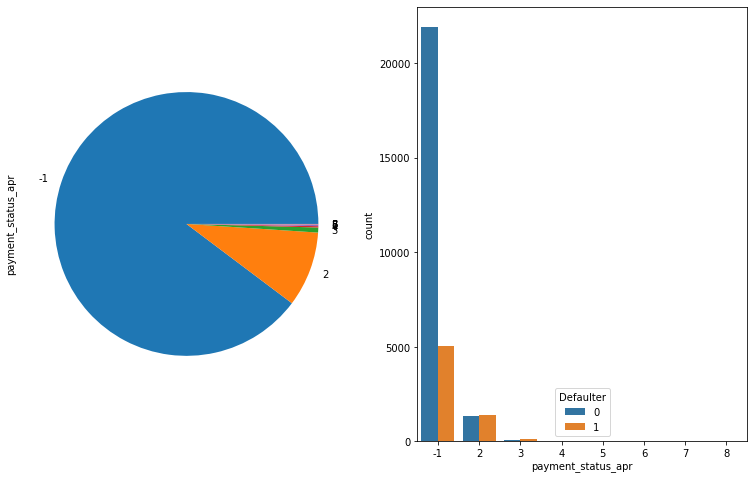

<Figure size 720x360 with 0 Axes>

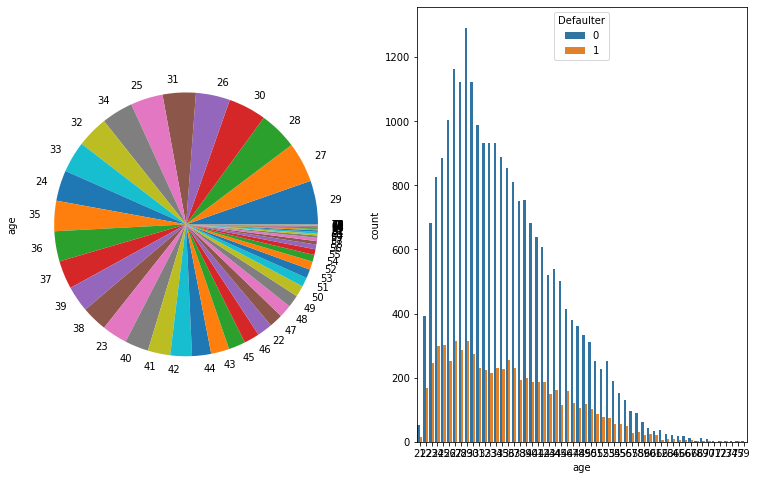

In [35]:
for col in categorical_features:
  plt.figure(figsize=(10,5))
  fig, axes = plt.subplots(ncols=2,figsize=(13,8))
  df[col].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
  sns.countplot(x = col, hue = 'Defaulter', data = cat_df)

###**Observations**
* We can see that more default cases are from the University and Graduate school
* In Case of 'Marital_status', both single persons and married people have a high likelihood of defaulting, although the proportion of single people is slightly higher.
*Since there are more women using credit cards, a higher percentage of defaulters are women.

##**Find the observations from Gender vs Martial Status ?**





In [36]:
# Create a new column "has_def" to indicate customers who have at least 1 deafult payment from April to September
# 0 : no default ; 1: has default

def_condition = (df.payment_status_sept >1) | (df.payment_status_aug >1) | (df.payment_status_jul >1) | (df.payment_status_jun >1) | (df.payment_status_may >1) | (df.payment_status_apr >1)
df.loc[def_condition, "has_def"] = 1
df.loc[df.has_def.isna(), "has_def"] = 0

# Define a function to plot stacked bar chart since there will be multiple stacked bars charts to plot

def create_stacked_bar(column_name):

    # Get the percentage of default by each group
    default_by_group = pd.crosstab(index=df['has_def'],columns = cat_df[column_name], normalize = 'columns')
    
    # Round up to 2 decimal
    default_by_group = default_by_group.apply(lambda x: round(x,2))
    
    labels = default_by_group.columns #creating label for the plot
    list1 = default_by_group.iloc[0].to_list()
    list2 = default_by_group.iloc[1].to_list()
    
    list1_name = "No default"
    list2_name = "Has default"
    title = f"Default by {column_name}"
    xlabel = column_name
    ylabel = "Default percentage"
    
    fig, ax = plt.subplots(figsize=(10, 5))
    bar_width = 0.5
    
    #plotting the bar chart
    ax1 = ax.bar(labels,list1, bar_width, label = list1_name, color = 'mediumaquamarine')
    ax2 = ax.bar(labels,list2, bar_width, bottom = list1, label = list2_name, color = 'orange')

#formatting the plot
    ax.set_title(title, fontweight = "bold")
    ax.set_xlabel(xlabel, fontweight = "bold")
    ax.set_ylabel(ylabel, fontweight = "bold")
    ax.legend(loc="best")

 #adding x and y ticks   
    plt.xticks(list(range(len(labels))), labels,rotation=90)
    plt.yticks(fontsize=9)

#to annotate the plot
    for r1, r2 in zip(ax1, ax2):
        h1 = r1.get_height()
        h2 = r2.get_height()
        plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., f"{h1:.0%}", ha="center", va="center", color="black", fontsize=11)
        plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., f"{h2:.0%}", ha="center", va="center", color="k", fontsize=11)

    plt.show()

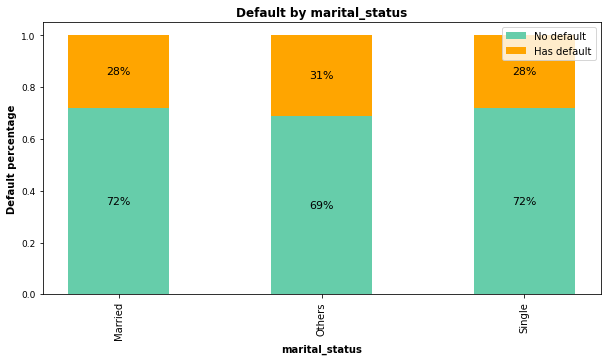

In [37]:
# Stacked bar chart to show default as per marital status
create_stacked_bar('marital_status')

The distribution of defaulters in each category is relatively comparable, as seen in the graph, suggesting that marital status has little bearing on defaulter customers. Others, however, are the most common category for defaulters.

##**Plot a stacked bar chart to visualize default percentage by female and male**

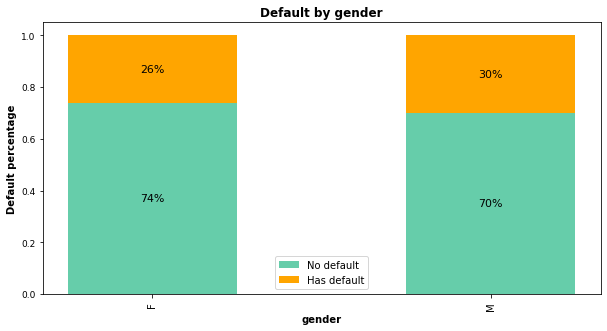

In [38]:
create_stacked_bar('gender')

We can see that there are more female defaulter but the rate of being defaulter is comparitevely higher in males with 30% of total defaulters comapared to 26% of female defaulter respectively.

##**Find the observations from Default vs Education ?**

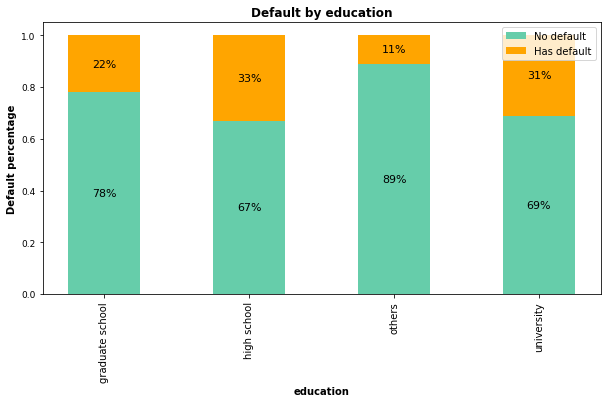

In [39]:
# Plot a stacked bar chart to show default by education level
create_stacked_bar('education')

We can see that customers with lower education levels default more. Customers with high school and university educational level have higher default percentages than customers with grad school education.

##**Defaulter rate in different age groups**

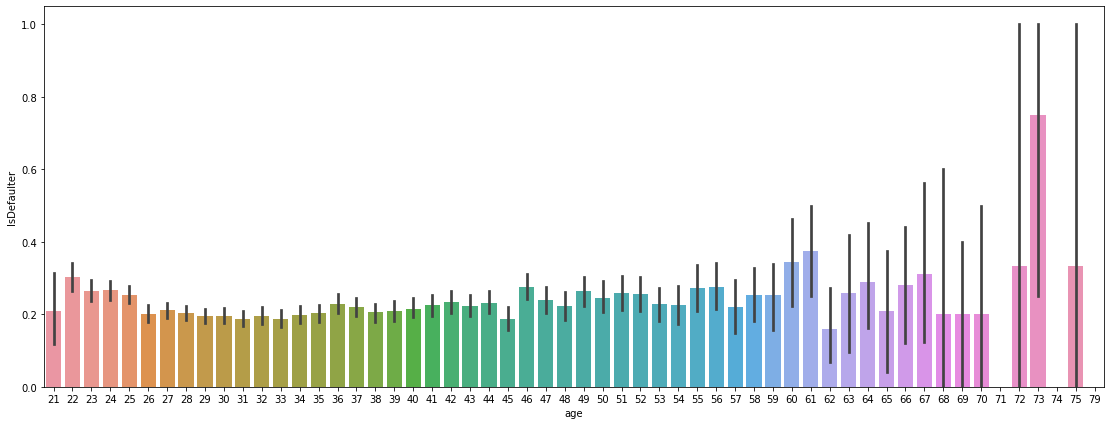

In [40]:
#plotting the bar plot to vizualize the data distribution related to the IsDefaulter
plt.figure(figsize=(19,7))
sns.barplot(x = 'age', y = 'IsDefaulter', data = df)

plt.show()

Younger age group (20-30) and older group greater than age 50 have higher number of defaulter rate. It can be due to as younger group are mostly student and may not have any income source and same as for older groups. Also, age group 30-40 have less defaulter rate and it may be because of as they have income source

##**Defaults based on Credit limits**

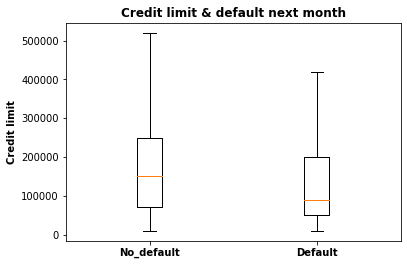

In [41]:
# Make a boxplot to visualize credit limit and default payment next month
# 1: default next month; 0: no default next month

def0 = df.loc[df['IsDefaulter'] == 0,'credit_limit']
def1 = df.loc[df['IsDefaulter'] == 1,'credit_limit']

#plotting the figure
fig, ax = plt.subplots() 
ax.boxplot([def0, def1],  showfliers=False)

#formattting the plot
ax.set_xticklabels(['No_default',"Default"],fontweight ='bold')
ax.set_ylabel('Credit limit',fontweight ='bold')
ax.set_title('Credit limit & default next month',fontweight ='bold')


plt.show()

Customers with high credit limits tend to pay the pay on time and hence are not defaulters.

#**Correlation between variables**

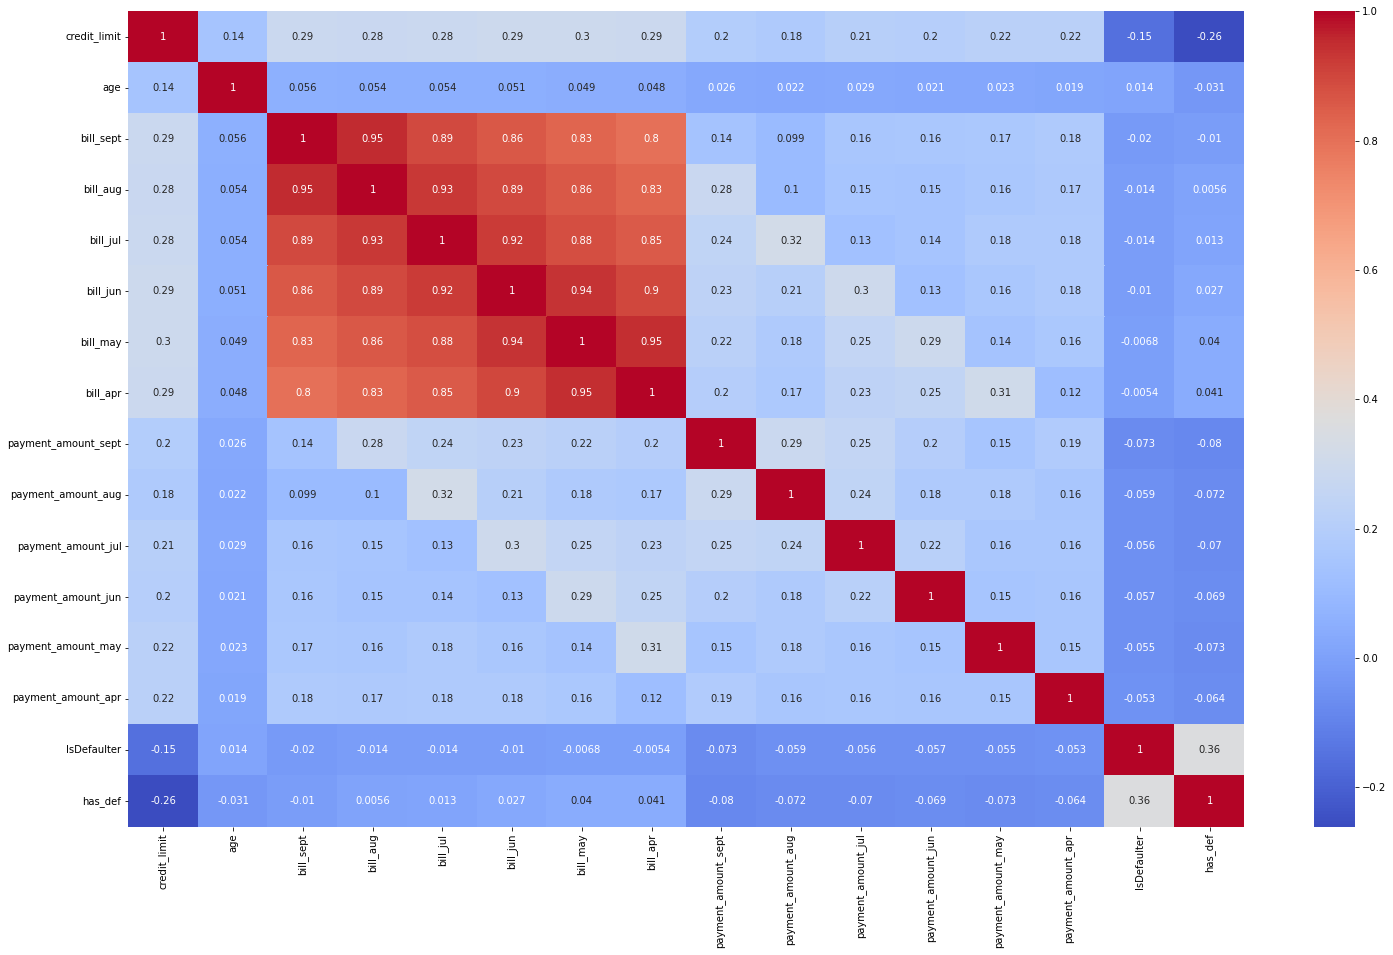

In [42]:
#plotting a heat map to understand correlation between features
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm" , ax=ax);

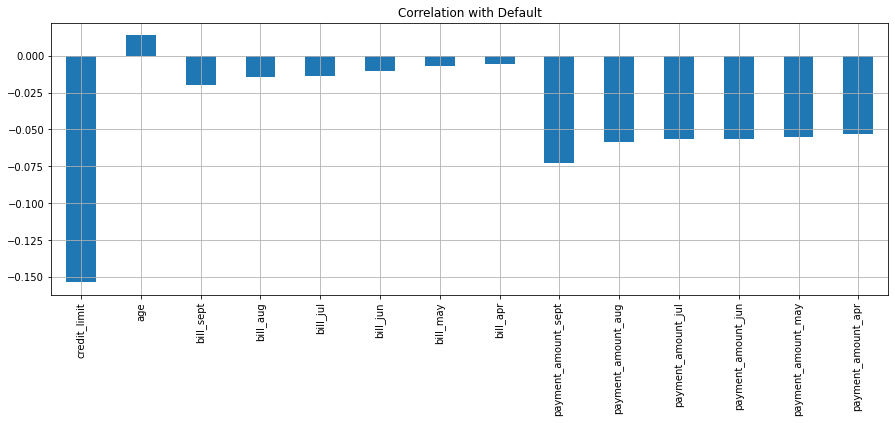

In [43]:
#plotting the feature importance as per peaarson correlation
X = df.drop(['IsDefaulter','has_def'],axis=1) #dropping column which are not required at present
X.corrwith(df['IsDefaulter']).plot.bar(figsize = (15, 5), title = "Correlation with Default",  #creating a bar plot of corrlation of features.
                                        fontsize = 10,rot = 90, grid = True)

Credit limit is the feature that is most negatively correlated, but we cannot simply ignore it because it is crucial for prediction. We will eliminate ID during the feature engineering process because it is unimportant and plays no part in prediction.

#**Feature Engineering**
##**One Hot encoding**

In [44]:
#Creating Copy
df_copy = df[['credit_limit', 'gender', 'education', 'marital_status', 'age',
       'payment_status_sept', 'payment_status_aug', 'payment_status_jul',
       'payment_status_jun', 'payment_status_may', 'payment_status_apr',
       'bill_sept', 'bill_aug', 'bill_jul', 'bill_jun', 'bill_may', 'bill_apr',
       'payment_amount_sept', 'payment_amount_aug', 'payment_amount_jul',
       'payment_amount_jun', 'payment_amount_may', 'payment_amount_apr',
       'IsDefaulter']]

In [45]:
# one hot encode all the categorical features
#Lets convert categorical fearures into object dtype first
df_copy[['gender','marital_status','education','payment_status_sept', 'payment_status_aug', 'payment_status_jul',
       'payment_status_jun', 'payment_status_may', 'payment_status_apr']] = df_copy[['gender','marital_status','education','payment_status_sept', 'payment_status_aug', 'payment_status_jul',
       'payment_status_jun', 'payment_status_may', 'payment_status_apr']].astype('object')

#One Hot encoding
df_copy = pd.get_dummies(df_copy)
df_copy.head()

,credit_limit,age,bill_sept,bill_aug,bill_jul,bill_jun,bill_may,bill_apr,payment_amount_sept,payment_amount_aug,...,payment_status_may_7,payment_status_may_8,payment_status_apr_-1,payment_status_apr_2,payment_status_apr_3,payment_status_apr_4,payment_status_apr_5,payment_status_apr_6,payment_status_apr_7,payment_status_apr_8
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,24,3913,3102,689,0,0,0,0,689,...,0,0,1,0,0,0,0,0,0,0
2,120000,26,2682,1725,2682,3272,3455,3261,0,1000,...,0,0,0,1,0,0,0,0,0,0
3,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,...,0,0,1,0,0,0,0,0,0,0
4,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,...,0,0,1,0,0,0,0,0,0,0
5,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,...,0,0,1,0,0,0,0,0,0,0


##**Feature Selection**
Feature selection helps in to reduce overfitting and improves accuracy
###**Feature Importance**
Feature importance gives us a score for each feature of our data, the higher the score more important or relevant is the feature towards our output variable.

In [46]:
# Split the df_copy into train and test sets

X_d = df_copy.drop(['IsDefaulter'], axis=1)  
y_d = df_copy['IsDefaulter']

feature_importances of tree based classifiers:
 [6.41070596e-02 6.71344362e-02 5.49575411e-02 5.16288995e-02
 5.02040226e-02 4.98453775e-02 4.95786032e-02 4.93685237e-02
 4.70536000e-02 4.56393908e-02 4.58088568e-02 4.55532824e-02
 4.66562873e-02 4.81443654e-02 6.72655464e-03 6.70367869e-03
 6.92736774e-03 7.92231771e-03 7.14903540e-03 1.77493740e-03
 6.74756921e-03 6.78656081e-03 2.06953021e-03 3.94238024e-02
 9.94529671e-03 4.59863843e-02 3.38747889e-03 6.09079025e-04
 1.19179838e-04 8.79902879e-05 4.50585431e-05 4.79599732e-05
 2.10279521e-02 2.18949224e-04 1.99349935e-02 2.21865481e-03
 5.12886176e-04 1.65223595e-04 6.20839320e-05 3.67177734e-05
 1.66365683e-05 1.76278647e-02 1.94649613e-05 1.12737806e-02
 1.27577808e-03 3.09980254e-04 1.21434585e-04 5.84156766e-05
 9.40411384e-05 1.46242407e-05 1.28295182e-02 9.73568019e-06
 9.25731543e-03 1.01419216e-03 4.97883638e-04 1.33280870e-04
 3.67462630e-05 1.61878307e-04 7.33476440e-06 8.70454865e-03
 6.08660370e-03 1.09588249e-03 3.4595

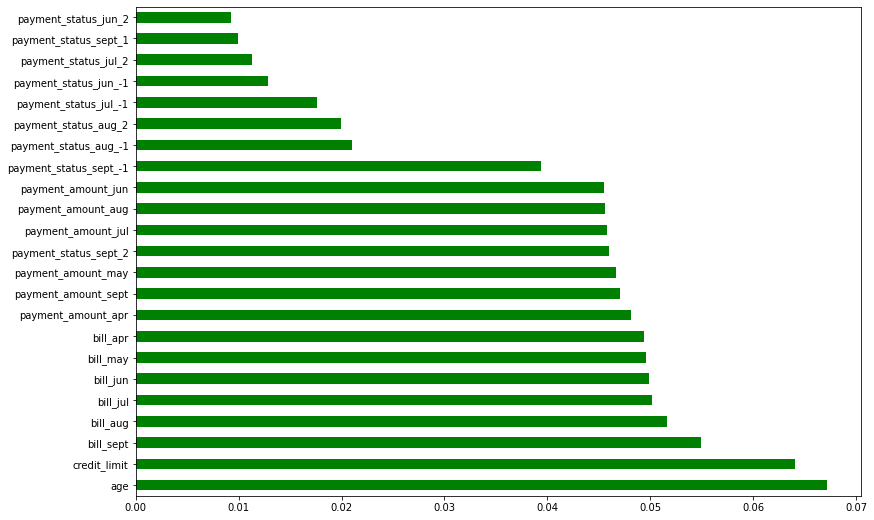

In [47]:
from sklearn.ensemble import RandomForestClassifier ,ExtraTreesClassifier, AdaBoostClassifier,GradientBoostingClassifier
model = ExtraTreesClassifier()
model.fit(X_d,y_d)
plt.figure(figsize=(13,9))

print('feature_importances of tree based classifiers:\n',model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_d.columns)
feat_importances.nlargest(23).plot(kind='barh',color='green')
plt.show()

 we are using Extra Tree Classifier for extracting the top 20 features for our dataset and Feature importance is an inbuilt class that comes with Tree Based Classifiers

#####**Feature Selection using ANOVA F-test**

In [48]:
from sklearn.feature_selection import RFE,SelectFromModel
num_feats  = 22
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=num_feats)
embeded_rf_selector.fit(X_d, y_d)
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X_d.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

20 selected features


In [49]:
print('selected features: \n',embeded_rf_feature)

selected features: 
 ['credit_limit', 'age', 'bill_sept', 'bill_aug', 'bill_jul', 'bill_jun', 'bill_may', 'bill_apr', 'payment_amount_sept', 'payment_amount_aug', 'payment_amount_jul', 'payment_amount_jun', 'payment_amount_may', 'payment_amount_apr', 'payment_status_sept_-1', 'payment_status_sept_2', 'payment_status_aug_-1', 'payment_status_aug_2', 'payment_status_jul_-1', 'payment_status_may_-1']


In [50]:
#selected_features in new dataframe
df_new = df_copy[['IsDefaulter','credit_limit', 'age', 'bill_sept', 'bill_aug', 'bill_jul', 'bill_jun', 'bill_may', 'bill_apr', 'payment_amount_sept', 'payment_amount_aug', 'payment_amount_jul', 'payment_amount_jun', 'payment_amount_may', 'payment_amount_apr', 'payment_status_sept_-1', 'payment_status_sept_2', 'payment_status_aug_-1', 'payment_status_jul_-1']]

#**Train-Test Split**
As we know our data is imbalanced that we observed already so we will be using SMOTE for class balancing

In [51]:
# Split the df_new into train and test sets
from sklearn.model_selection import KFold,GridSearchCV,RandomizedSearchCV,train_test_split
X = df_new.drop(['IsDefaulter'], axis=1)  
y = df_new['IsDefaulter']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [52]:
# Create the training df by remerging X_train and y_train
df_train = X_train.join(y_train)

In [53]:
# Check the distribution of the samples in the train dataset

# Separate majority and minority classes
df_majority = df_train[df_train.IsDefaulter == 0]
df_minority = df_train[df_train.IsDefaulter == 1]

major_percent = df_majority.IsDefaulter.count()/ df_train.shape[0]*100
minor_percent = df_minority.IsDefaulter.count()/ df_train.shape[0]*100

print('Customers with No Default Payment Next Month :')
print(f'{df_majority.IsDefaulter.count()}({round(major_percent,2)}%)')
print("-----------")
print('Customers with Default Payment Next Month :')
print(f'{df_minority.IsDefaulter.count()}({round(minor_percent,2)}%)')



Customers with No Default Payment Next Month :
16324(77.73%)
-----------
Customers with Default Payment Next Month :
4676(22.27%)


In [54]:
#SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_SMOTE, y_SMOTE = sm.fit_resample(X_train, y_train)
print(len(y_SMOTE))
print(y_SMOTE.sum())

32648
16324


In [55]:
## Original Dataset
xtrain_data = [X_SMOTE]
ytrain_data = [y_SMOTE]
name = ['SMOTE']

##**Predictive Models**
###**Metric**
For evaluation, we choose recall as the metric as we would like to predict which customers are likely to have default payment next month based on prudence -- we rather overestimate the potential loss/short of income flow than underestimate it in the perspective of cash flow control and risk management. We want to identify as many default customers as possible even though some of them are not actually defaulted. Recall is the ratio of True Positive over the sum of True Positive and False Negative which is the probability that we predict correctly.

In [56]:
# Define a function which evaluates the model with train and test score 
# and also performs a K-fold cross validation on the train dataset
from sklearn.metrics import classification_report,confusion_matrix,f1_score,roc_auc_score,roc_curve,accuracy_score, recall_score
def model_eval(algo, Xtrain,ytrain,Xtest,ytest):
    from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,classification_report

    algo.fit(Xtrain,ytrain)
    y_pred = algo.predict(Xtrain)
    y_train_prob = algo.predict_proba(Xtrain)[:,1]

    #print('confusion matrix-train\n',confusion_matrix(ytrain,y_pred))
    print('Overall Train Accuracy',accuracy_score(ytrain,y_pred))
    print('Train AUC Score',roc_auc_score(ytrain,y_train_prob))
    print('Overall Train recall',recall_score(ytrain,y_pred))

    y_test_pred = algo.predict(Xtest)
    y_test_prob = algo.predict_proba(Xtest)[:,1]
        
    print('Overall Test Accuracy\n',accuracy_score(ytest,y_test_pred))
    print('Test AUC Score\n',roc_auc_score(ytest,y_test_prob))
    print('Classification Report of Test\n',  classification_report(ytest, y_test_pred))

    f,ax =  plt.subplots(1,2,figsize=(14,6))
    #plt.figure(figsize=(6,4))
    ConfMatrix = confusion_matrix(ytest,y_test_pred)
    sns.heatmap(ConfMatrix,annot=True, cmap='YlGnBu', fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'],linewidths=.5,ax = ax[0])
    ax[0].set_ylabel('True label')
    ax[0].set_xlabel('Predicted label')
    ax[0].set_title('Confusion Matrix')

    global fpr,tpr,thresholds
    fpr,tpr,thresholds = roc_curve(ytest,y_test_prob)
    ax[1].plot(fpr,tpr,color = 'r')
    ax[1].plot(fpr,fpr,color = 'green')
    ax[1].set_ylabel('TPR')
    ax[1].set_xlabel('FPR')
    ax[1].set_title('ROC Curve')
    plt.show()

#**LOgistic Regression**

In [57]:
# Finding the best parameters for all the datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
for Xtrain,ytrain,sampleName in zip(xtrain_data,ytrain_data,name):
    global best_log
    print('Data is ',sampleName)
    best_log = []
    # Setup the hyperparameter grid, (not scaled data)
    param_grid = {'C': np.logspace(-5, 8, num = 15)}
    ss = StandardScaler()
    standardized_Xtrain = ss.fit_transform(Xtrain)
    standardized_Xtrain_df = pd.DataFrame(standardized_Xtrain,columns = Xtrain.columns)
    
    # Instantiate a logistic regression classifier
    logreg = LogisticRegression()
    # Instantiate the RandomizedSearchCV object
    logreg_cv = RandomizedSearchCV(logreg, param_grid ,scoring = 'recall', cv=5, random_state=0)
    # Fit it to the data
    logreg_cv.fit(standardized_Xtrain_df,ytrain)
    best_log.append(logreg_cv.best_params_)
    # Print the tuned parameters and score
    print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
    print("_" * 100)

Data is  SMOTE
Tuned Logistic Regression Parameters: {'C': 3.727593720314938}
____________________________________________________________________________________________________


In [58]:
# Best Parameter of each Sampling Method

param_log =[{'C': 3.727593720314938}]

Data is  SMOTE  And with hyper parameter  {'C': 3.727593720314938}
Overall Train Accuracy 0.7710732663562853
Train AUC Score 0.8207327560300148
Overall Train recall 0.7083435432492037
Overall Test Accuracy
 0.7678888888888888
Test AUC Score
 0.7434262305774582
Classification Report of Test
               precision    recall  f1-score   support

           0       0.87      0.82      0.85      7040
           1       0.47      0.56      0.51      1960

    accuracy                           0.77      9000
   macro avg       0.67      0.69      0.68      9000
weighted avg       0.78      0.77      0.77      9000



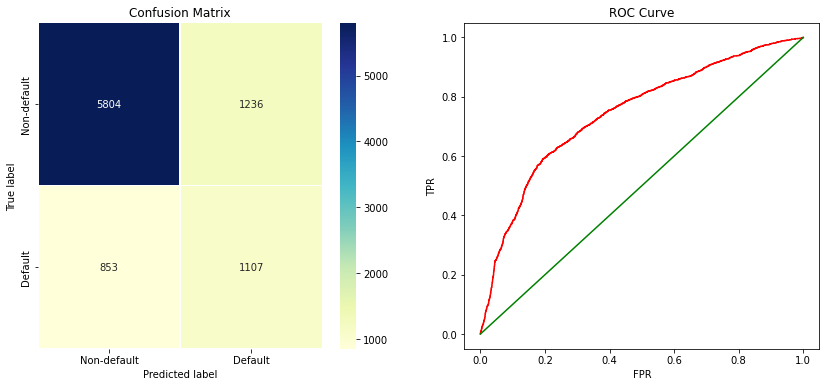

____________________________________________________________


In [59]:
# Result of each Sampling Method

index = [0]

for Xtrain,ytrain,sampleName,index in zip(xtrain_data,ytrain_data,name,index):
    print('Data is ',sampleName ,' And with hyper parameter ', param_log[index])
    ss = StandardScaler()
    standardized_Xtrain = ss.fit_transform(Xtrain)
    standardized_Xtrain_df = pd.DataFrame(standardized_Xtrain,columns = Xtrain.columns)
    standardized_Xtest = ss.transform(X_test)
    model_eval(LogisticRegression(**param_log[index],random_state= 42), standardized_Xtrain_df ,ytrain ,standardized_Xtest,y_test)
    print("_" * 60)

#**Decision Tree**

In [60]:
# Find out the best parameters for all the datasets
from scipy.stats import randint as sp_randint
from sklearn.tree import DecisionTreeClassifier
for Xtrain,ytrain,sampleName in zip(xtrain_data,ytrain_data,name):
    print('Data is ',sampleName)
    # Instantiate a Decision Tree classifier: tree
    dtc = DecisionTreeClassifier(random_state = 42)

    # Setup the parameters and distributions to sample from: param_dist
    params = {'max_depth': sp_randint(2,20),
             'min_samples_leaf':sp_randint(1,20),
             'min_samples_split':sp_randint(2,40),
             'criterion':['gini','entropy']}

    # Instantiate the RandomizedSearchCV object: tree_cv
    rsearch_dt = RandomizedSearchCV(dtc, param_distributions= params, cv = 5, scoring = 'recall',n_iter = 100,n_jobs = -1)

    # Fit it to the data
    rsearch_dt.fit(Xtrain, ytrain)
    print("Tuned Decision Tree Parameters: {}".format(rsearch_dt.best_params_), "for",sampleName)
    print("_" * 100) 

Data is  SMOTE
Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 23} for SMOTE
____________________________________________________________________________________________________


In [62]:
# Best Parameter of each Sampling Method
param_dt = [{'criterion': 'entropy', 'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 23}]

Data is  SMOTE  And with hyper parameter  {'criterion': 'entropy', 'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 23}
Overall Train Accuracy 0.8891203136486155
Train AUC Score 0.9658798759390896
Overall Train recall 0.876010781671159
Overall Test Accuracy
 0.7158888888888889
Test AUC Score
 0.6663278351113173
Classification Report of Test
               precision    recall  f1-score   support

           0       0.84      0.78      0.81      7040
           1       0.38      0.48      0.43      1960

    accuracy                           0.72      9000
   macro avg       0.61      0.63      0.62      9000
weighted avg       0.74      0.72      0.73      9000



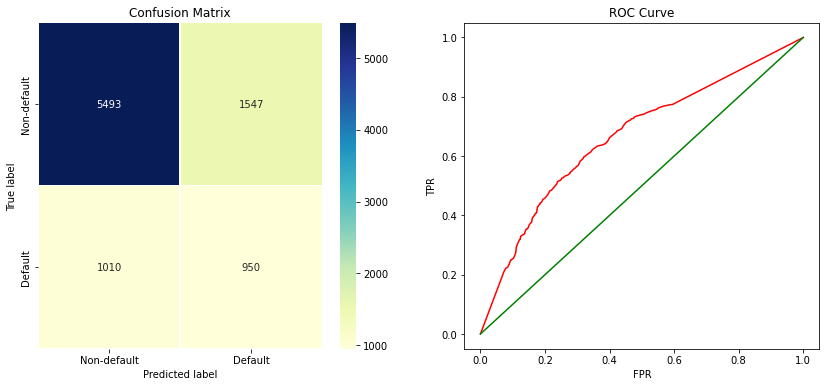

____________________________________________________________


In [63]:
index = [0]
for Xtrain,ytrain,sampleName,index in zip(xtrain_data,ytrain_data,name,index):
    print('Data is ',sampleName ,' And with hyper parameter ',param_dt[index])
    model_eval(DecisionTreeClassifier(**param_dt[index],random_state= 42), Xtrain,ytrain,X_test,y_test)
    print("_" * 60)

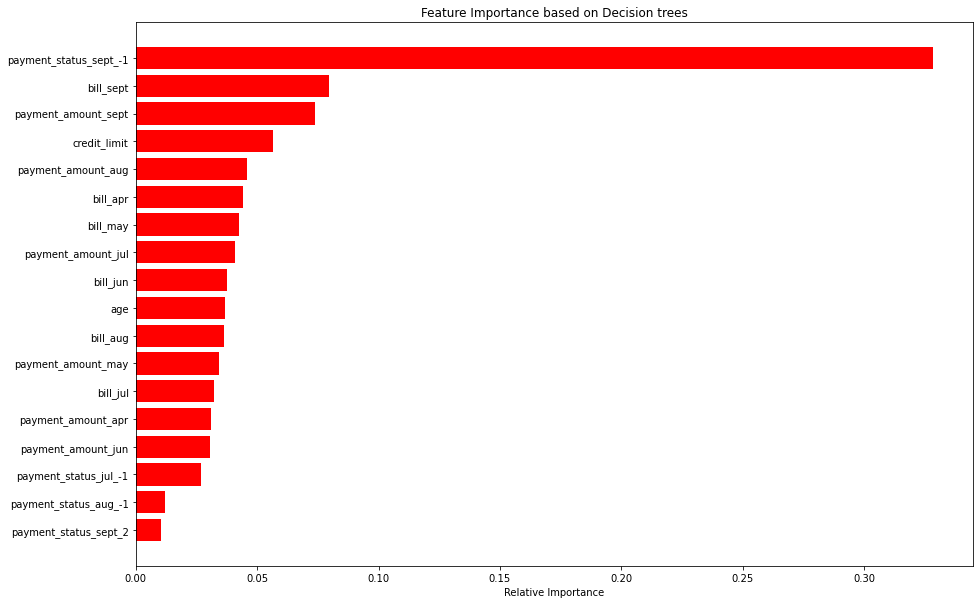

In [64]:
#Plotting feature importance based on Decision Trees:
features = X_train.columns
importances = rsearch_dt.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15,10))
plt.title('Feature Importance based on Decision trees')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#**RandomForest**

In [65]:
# Find out the best parameters for all the datasets

for Xtrain,ytrain,sampleName in zip(xtrain_data,ytrain_data,name):
    global best_rf
    best_rf =[]
    print('Data is ',sampleName)
    # Instantiate a Random forest classifier: tree
    rfc = RandomForestClassifier(random_state = 42)

    # Setup the parameters and distributions to sample from: param_dist
    params = {'n_estimators' : sp_randint(50,200),
              'max_features' : sp_randint(1,24),'max_depth': sp_randint(2,10),
             'min_samples_leaf':sp_randint(1,20),
             'min_samples_split':sp_randint(2,20),
             'criterion':['gini','entropy']}

    # Instantiate the RandomizedSearchCV object
    rsearch_rfc = RandomizedSearchCV(rfc, param_distributions= params, cv = 3, scoring = 'recall',n_iter = 50,random_state = 42,n_jobs = -1,return_train_score = True)

    # Fit it to the data
    rsearch_rfc.fit(Xtrain, ytrain)
    best_rf.append(rsearch_rfc.best_params_)
    print("Tuned Random Tree Parameters: {}".format(rsearch_rfc.best_params_), "for",sampleName)
    print("_" * 100)

Data is  SMOTE
Tuned Random Tree Parameters: {'criterion': 'gini', 'max_depth': 7, 'max_features': 2, 'min_samples_leaf': 12, 'min_samples_split': 7, 'n_estimators': 117} for SMOTE
____________________________________________________________________________________________________


In [66]:
# Best Parameter of each Sampling Method

param_rf = [{'criterion': 'gini', 'max_depth': 7, 'max_features': 2, 'min_samples_leaf': 12, 'min_samples_split': 7, 'n_estimators': 117}]

Data is  SMOTE  And with hyper parameter  {'criterion': 'gini', 'max_depth': 7, 'max_features': 2, 'min_samples_leaf': 12, 'min_samples_split': 7, 'n_estimators': 117}
Overall Train Accuracy 0.7979661847586376
Train AUC Score 0.863850629266061
Overall Train recall 0.738299436412644
Overall Test Accuracy
 0.7778888888888889
Test AUC Score
 0.7627433977852505
Classification Report of Test
               precision    recall  f1-score   support

           0       0.87      0.84      0.86      7040
           1       0.49      0.54      0.52      1960

    accuracy                           0.78      9000
   macro avg       0.68      0.69      0.69      9000
weighted avg       0.79      0.78      0.78      9000



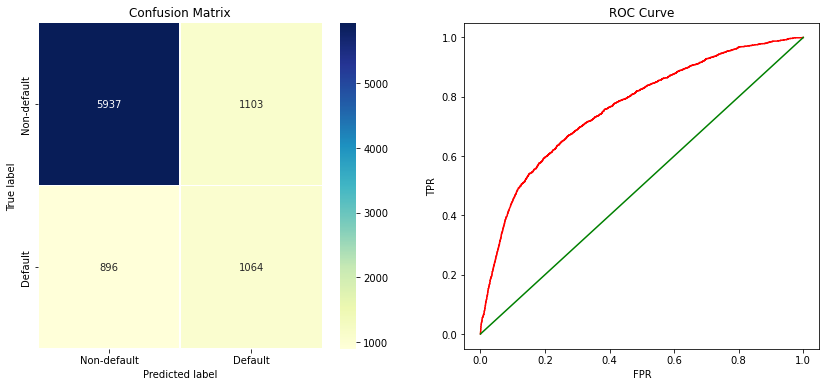

____________________________________________________________


In [67]:
# Result of each Sampling Method
index = [0]
for Xtrain,ytrain,sampleName,index in zip(xtrain_data,ytrain_data,name,index):
    print('Data is ',sampleName ,' And with hyper parameter ',param_rf[index])
    model_eval(RandomForestClassifier(**param_rf[index],random_state= 42), Xtrain, ytrain,X_test,y_test)
    print("_" * 60)

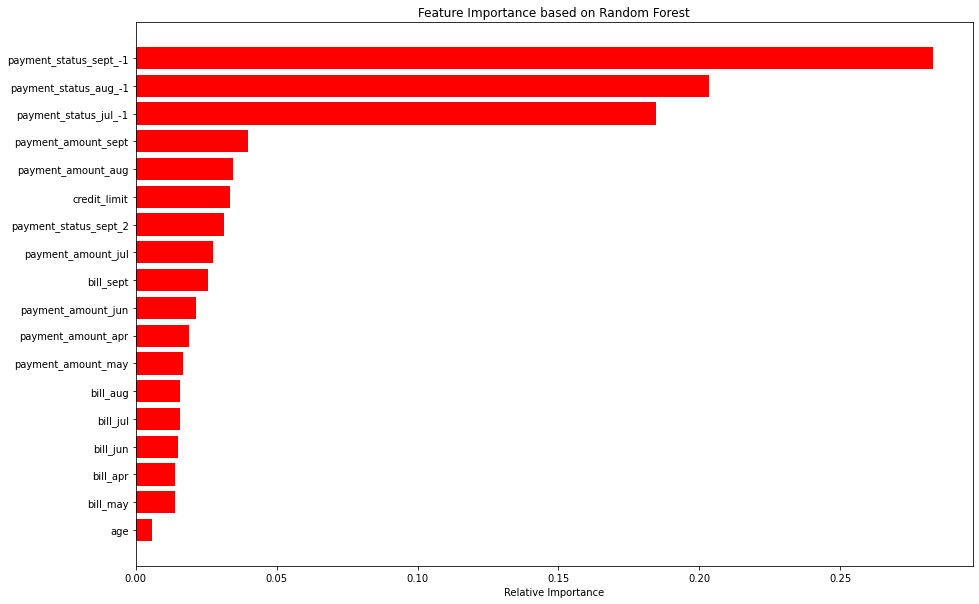

In [69]:
#Plotting feature importance based on Random Forest:
features = X_train.columns
importances = rsearch_rfc.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15,10))
plt.title('Feature Importance based on Random Forest')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#**KNN**

In [70]:
from sklearn.neighbors import KNeighborsClassifier
for Xtrain,ytrain in zip(xtrain_data,ytrain_data):
    global best_knn
    best_knn = []
    print('Data is ',sampleName)
    # Setup the hyperparameter grid, (not scaled data)
    param_grid = {
        "n_neighbors":[500, 800,1000, 1500, 2000],
        'leaf_size': [5,10,20,30,50],
        
    }
    # Instantiate a support vector classifier
    knn_clf  = KNeighborsClassifier()
    # Instantiate the RandomizedSearchCV object
    randomknn_clf = RandomizedSearchCV(knn_clf, param_grid ,refit = True, verbose =3, scoring = 'recall', cv=3, random_state=0)
    
    # Fit it to the data
    randomknn_clf.fit(Xtrain, ytrain)
    best_knn.append(randomknn_clf.best_params_)
    # Print the tuned parameters and score
    print("Tuned KNN Parameters: {}".format(randomknn_clf.best_params_))
    print("_" * 100)

Data is  SMOTE
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END .....leaf_size=10, n_neighbors=500;, score=0.764 total time=   6.9s
[CV 2/3] END .....leaf_size=10, n_neighbors=500;, score=0.780 total time=   5.6s
[CV 3/3] END .....leaf_size=10, n_neighbors=500;, score=0.772 total time=   5.4s
[CV 1/3] END .....leaf_size=5, n_neighbors=1000;, score=0.729 total time=   6.8s
[CV 2/3] END .....leaf_size=5, n_neighbors=1000;, score=0.744 total time=   6.5s
[CV 3/3] END .....leaf_size=5, n_neighbors=1000;, score=0.726 total time=   6.4s
[CV 1/3] END ....leaf_size=30, n_neighbors=2000;, score=0.647 total time=   8.4s
[CV 2/3] END ....leaf_size=30, n_neighbors=2000;, score=0.655 total time=   8.3s
[CV 3/3] END ....leaf_size=30, n_neighbors=2000;, score=0.658 total time=   8.0s
[CV 1/3] END .....leaf_size=30, n_neighbors=800;, score=0.752 total time=   7.0s
[CV 2/3] END .....leaf_size=30, n_neighbors=800;, score=0.767 total time=   6.1s
[CV 3/3] END .....leaf_size=30, n

In [71]:
# Best Parameter of each Sampling Method
param_knn = [randomknn_clf.best_params_]

Data is  SMOTE  And with hyper parameter  {'n_neighbors': 500, 'leaf_size': 10}
Overall Train Accuracy 0.6144021073266356
Train AUC Score 0.6737529455894995
Overall Train recall 0.7722984562607204
Overall Test Accuracy
 0.518
Test AUC Score
 0.6506062297077921
Classification Report of Test
               precision    recall  f1-score   support

           0       0.87      0.45      0.59      7040
           1       0.28      0.76      0.41      1960

    accuracy                           0.52      9000
   macro avg       0.57      0.61      0.50      9000
weighted avg       0.74      0.52      0.55      9000



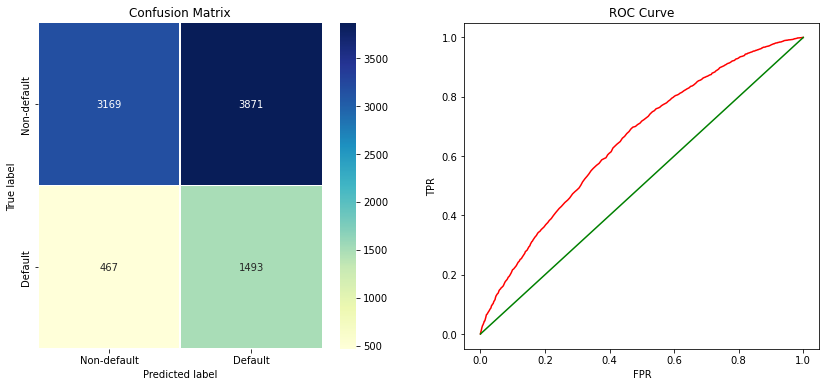

____________________________________________________________


In [72]:
# Result of each Sampling Method
index = [0]
for Xtrain,ytrain,sampleName,index in zip(xtrain_data,ytrain_data,name,index):
    print('Data is ',sampleName ,' And with hyper parameter ',param_knn[index])
    model_eval(KNeighborsClassifier(**param_knn[index]), Xtrain, ytrain,X_test,y_test)
    print("_" * 60)

#**RESULTS**
##**Logistic regression ▶** 
**Train Accuracy ▶** 0.7710 <br>
**Test Accuracy ▶** 0.7678<br>
**Precision Score ▶** 0.87 for Class 0 and 0.47 for class 1 <br>
**Recall score ▶** 0.82 for Class 0 and 0.56 for class 1 <br>
**F-1 Score ▶** 0.85 for Class 0 and 0.51 for class 1 <br>
##**Decision Tree ▶** 
**Train Accuracy ▶** 0.8891 <br>
**Test Accuracy ▶** 0.7158<br>
**Precision Score ▶** 0.84 for Class 0 and 0.38 for class 1 <br>
**Recall score ▶** 0.78 for Class 0 and 0.48 for class 1 <br>
**F-1 Score ▶** 0.81 for Class 0 and 0.43 for class 1 <br>
##**Random Forest ▶** 
**Train Accuracy ▶** 0.7979 <br>
**Test Accuracy ▶** 0.7778<br>
**Precision Score ▶** 0.87 for Class 0 and 0.49 for class 1 <br>
**Recall score ▶** 0.84 for Class 0 and 0.54 for class 1 <br>
**F-1 Score ▶** 0.86 for Class 0 and 0.52 for class 1 <br>
##**KNN ▶** 
**Train Accuracy ▶** 0.6144 <br>
**Test Accuracy ▶** 0.518<br>
**Precision Score ▶** 0.87 for Class 0 and 0.28 for class 1 <br>
**Recall score ▶** 0.45 for Class 0 and 0.76 for class 1 <br>
**F-1 Score ▶** 0.59 for Class 0 and 0.41 for class 1 <br>

#**Conclusions**


1.  **As the company can not afford the False Negative so main metric to comapre all algorithm is Recall metric.**
2.   **Logistic Regression had an imbalance in the recall score of about 82% for class 0 and 56% for class 1.**
3. **Performance on Decision Tree is comparatively better. Decision Trees have recall scores of 78%(class 0) , 48%(class 1).**
4. **Imbalanced data was balanced using SMOTE sampling technique.**
5. **Data categorical variables had minority classes which were added to their closest majority class**
6. **There were not huge gap but female clients tended to default the most.**
7. **Random forest have the highest test accuracy with 77%.**

 

##**Resources:** 
[Almabetter](https://www.almabetter.com/courses/full-stack-data-science) <br>
[Geeksforgeeks](https://www.geeksforgeeks.org/machine-learning/) <br>
[Towardsdatascience](https://towardsdatascience.com)